In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/talent-academy-case-dt-2025/Talent_Academy_Case_DT_2025.xlsx


In [2]:
# kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
import seaborn as sns

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_colwidth", 200)
sns.set(rc={"figure.figsize": (8,5)})

# Kaggle yolunu kendine göre kontrol et
path = "/kaggle/input/talent-academy-case-dt-2025/Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(path)

df.head()


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [4]:
df.shape

(2235, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [6]:
df.describe()

,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


In [7]:
# veri içerisinde bulunan sütunları listeyelim.
df.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi'],
      dtype='object')

In [8]:
df = df.copy()

In [9]:
df.rename(columns={
    'HastaNo'        : 'hasta_no',
    'Yas'            : 'yas',
    'Cinsiyet'       : 'cinsiyet',
    'KanGrubu'       : 'kan_grubu',
    'Uyruk'          : 'uyruk',
    'KronikHastalik' : 'kronik_hastalik',
    'Bolum'          : 'bolum',
    'Alerji'         : 'alerji',
    'Tanilar'        : 'tanilar',
    'TedaviAdi'      : 'tedavi_adi',
    'TedaviSuresi'   : 'tedavi_suresi',
    'UygulamaYerleri': 'uygulama_yerleri',
    'UygulamaSuresi' : 'uygulama_suresi'
}, inplace=True)

df.head()

,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_suresi,uygulama_yerleri,uygulama_suresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [10]:
def to_nullable_int(series, round_mode="round"):
    x = (series.astype(str)
               .str.replace(",", ".", regex=False)
               .str.extract(r"(\d+(?:\.\d+)?)")[0]
               .astype(float))
    if round_mode == "round":
        x = x.round()
    elif round_mode == "floor":
        x = np.floor(x)
    elif round_mode == "ceil":
        x = np.ceil(x)
    return x.astype("int64")  # <-- pandas nullable integer

# Uygulama:
if "tedavi_suresi" in df.columns:
    df["tedavi_suresi"] = to_nullable_int(df["tedavi_suresi"], round_mode="round")

if "uygulama_suresi" in df.columns:
    df["uygulama_suresi"] = to_nullable_int(df["uygulama_suresi"], round_mode="round")

In [11]:
# Kaggle/working altına kaydet
out_path_xlsx = "/kaggle/working/dataset_clean.xlsx"

df.to_excel(out_path_xlsx, index=False)

df.head()

,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_suresi,uygulama_yerleri,uygulama_suresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


In [12]:
df.head()

,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_suresi,uygulama_yerleri,uygulama_suresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


In [13]:
df.isnull().sum()

hasta_no              0
yas                   0
cinsiyet            169
kan_grubu           675
uyruk                 0
kronik_hastalik     611
bolum                11
alerji              944
tanilar              75
tedavi_adi            0
tedavi_suresi         0
uygulama_yerleri    221
uygulama_suresi       0
dtype: int64

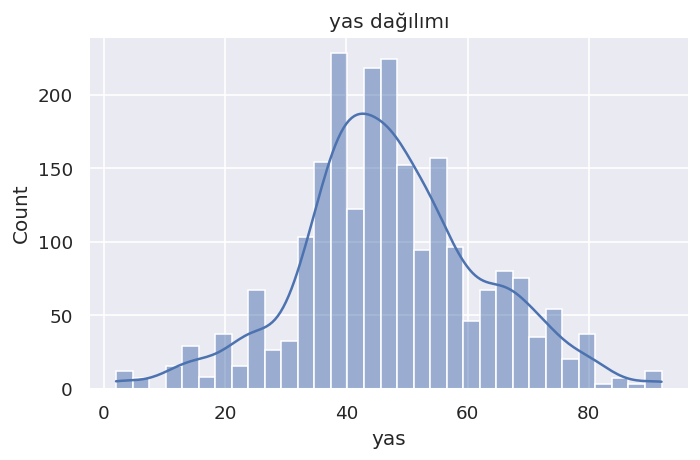

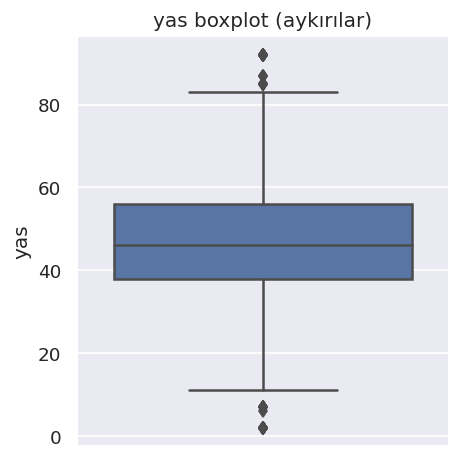

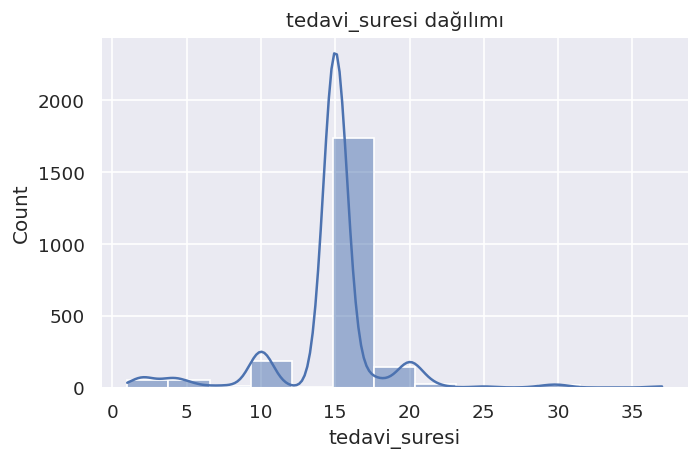

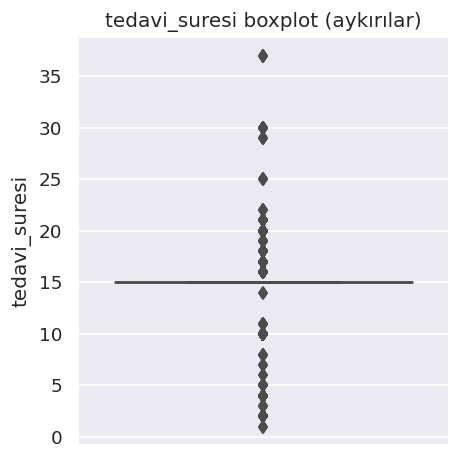

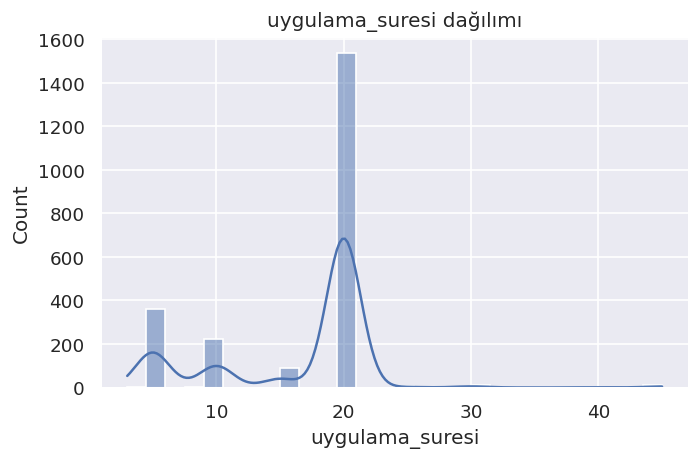

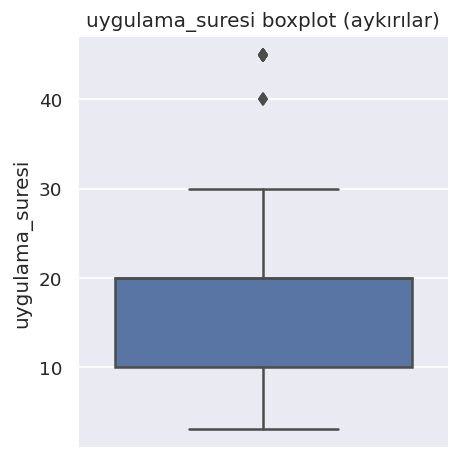

,cinsiyet,count
0,Kadın,1274
1,Erkek,792
2,Bilinmiyor,169


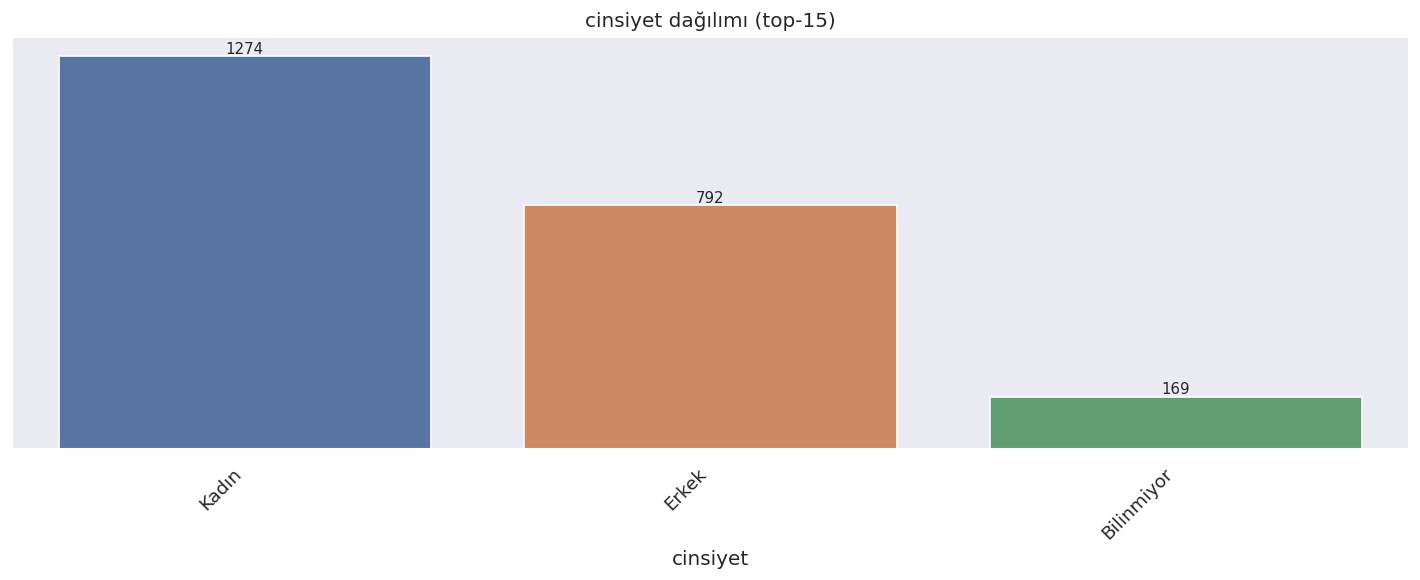

,kan_grubu,count
0,Bilinmiyor,675
1,0 Rh+,579
2,A Rh+,540
3,B Rh+,206
4,AB Rh+,80
5,B Rh-,68
6,A Rh-,53
7,0 Rh-,26
8,AB Rh-,8


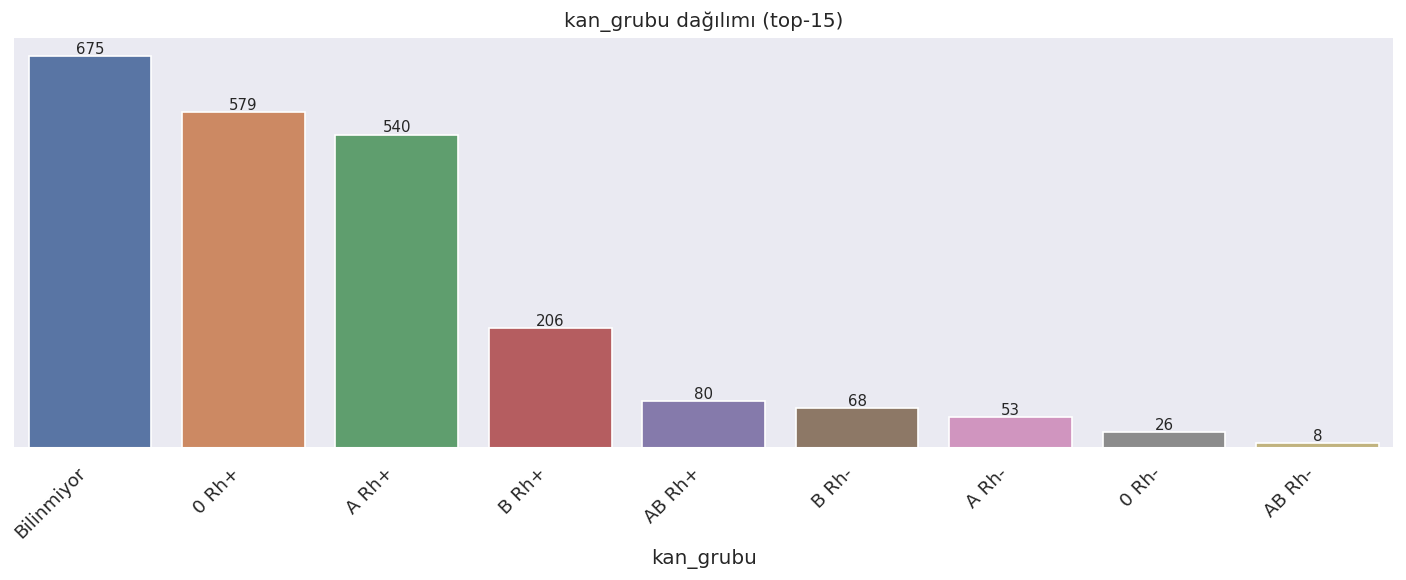

,uyruk,count
0,Türkiye,2173
1,Tokelau,27
2,Arnavutluk,13
3,Azerbaycan,12
4,Libya,10


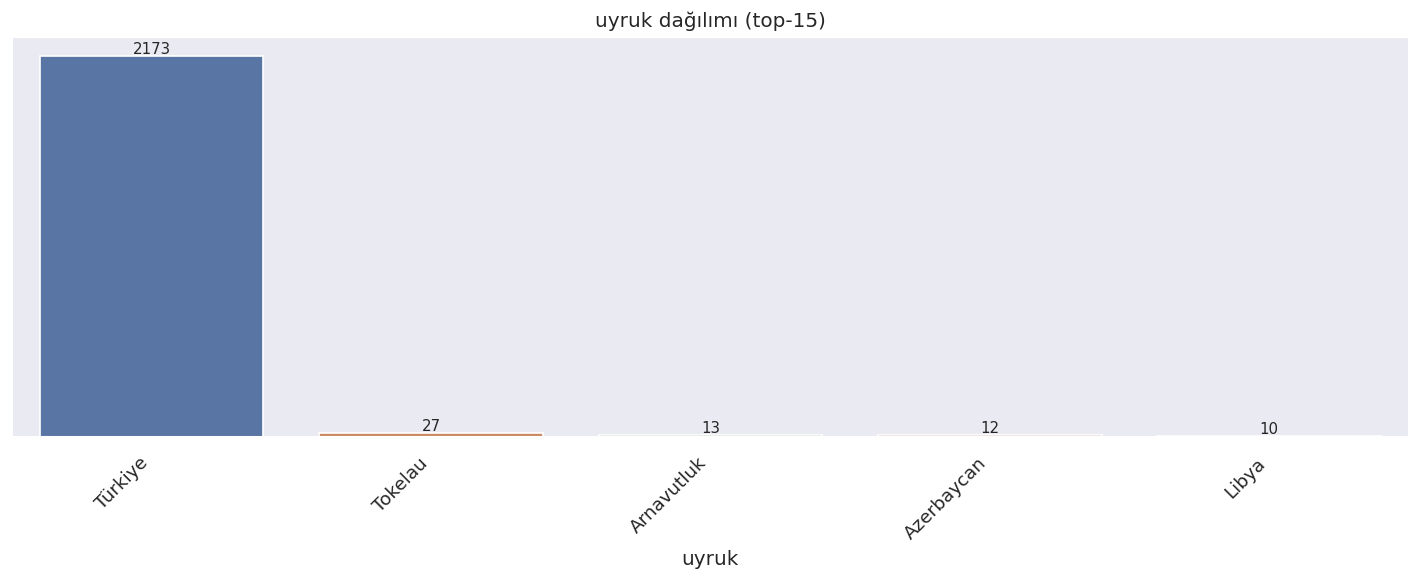

,bolum,count
0,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",2045
1,Ortopedi Ve Travmatoloji,88
2,İç Hastalıkları,32
3,Nöroloji,17
4,Kardiyoloji,11
5,Bilinmiyor,11
6,Göğüs Hastalıkları,8
7,Laboratuar,7
8,Genel Cerrahi,6
9,Tıbbi Onkoloji,6


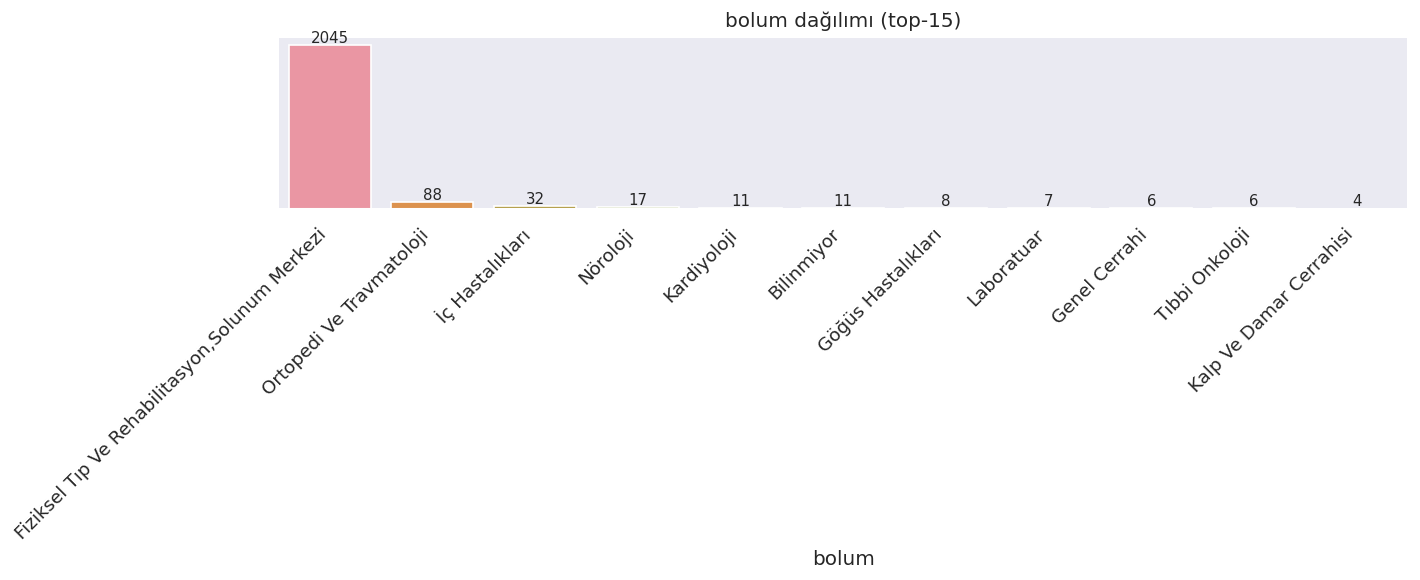

,tedavi_adi,count
0,Dorsalji -Boyun+trapez,231
1,İV DİSK BOZUKLUĞU-BEL,200
2,Dorsalji 1,140
3,Dorsalji-Bel,120
4,Gonartroz-Meniskopati,95
5,SAĞ OMUZ İMPİNGEMENT,70
6,Boyun-Trapezz,60
7,Dorsalji-Dorsal,56
8,Sol omuz İmpingement,50
9,Alt ekstremite atrofi-Bilateral,37


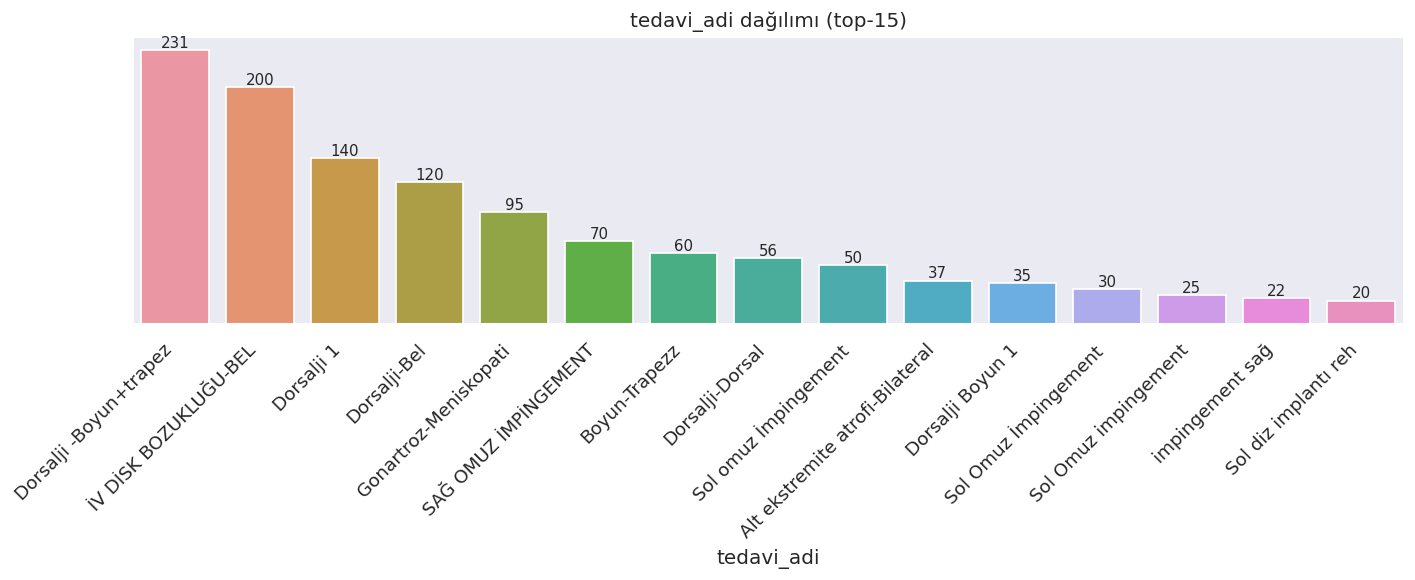

,tanilar,count
0,"DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE",151
1,Omuzun darbe sendromu,129
2,"İntervertebral disk bozuklukları, tanımlanmamış",117
3,"DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",97
4,Bilinmiyor,75
5,Eklem ağrısı,55
6,"DORSALJİ, DİĞER, SERVİKAL BÖLGE",49
7,Radikülopati,38
8,"Dorsalji, tanımlanmamış",34
9,"Menisküs yırtığı, şimdiki",30


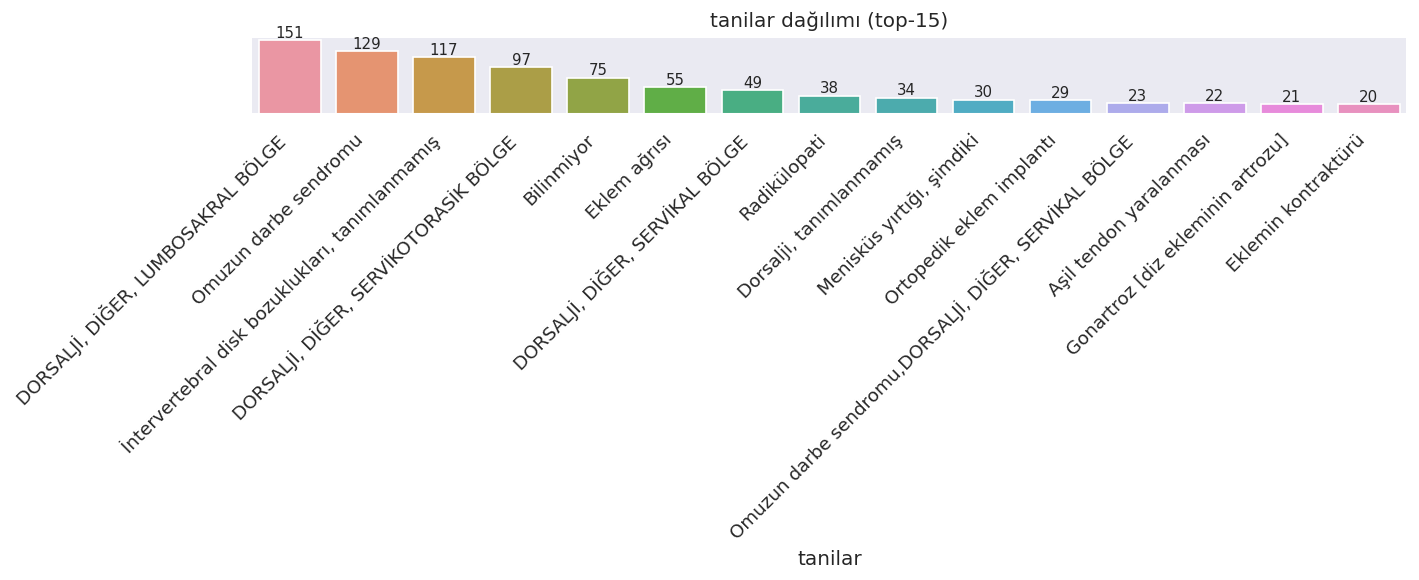

,kronik_hastalik,count
0,Bilinmiyor,611
1,Aritmi,395
2,Hiportiroidizm,383
3,Limb-Girdle Musküler Distrofi,379
4,Astım,351
5,Hipertiroidizm,327
6,Myastenia gravis,316
7,Diyabet,308
8,Duchenne Musküler Distrofisi,307
9,Fascioscapulohumeral Distrofi,304


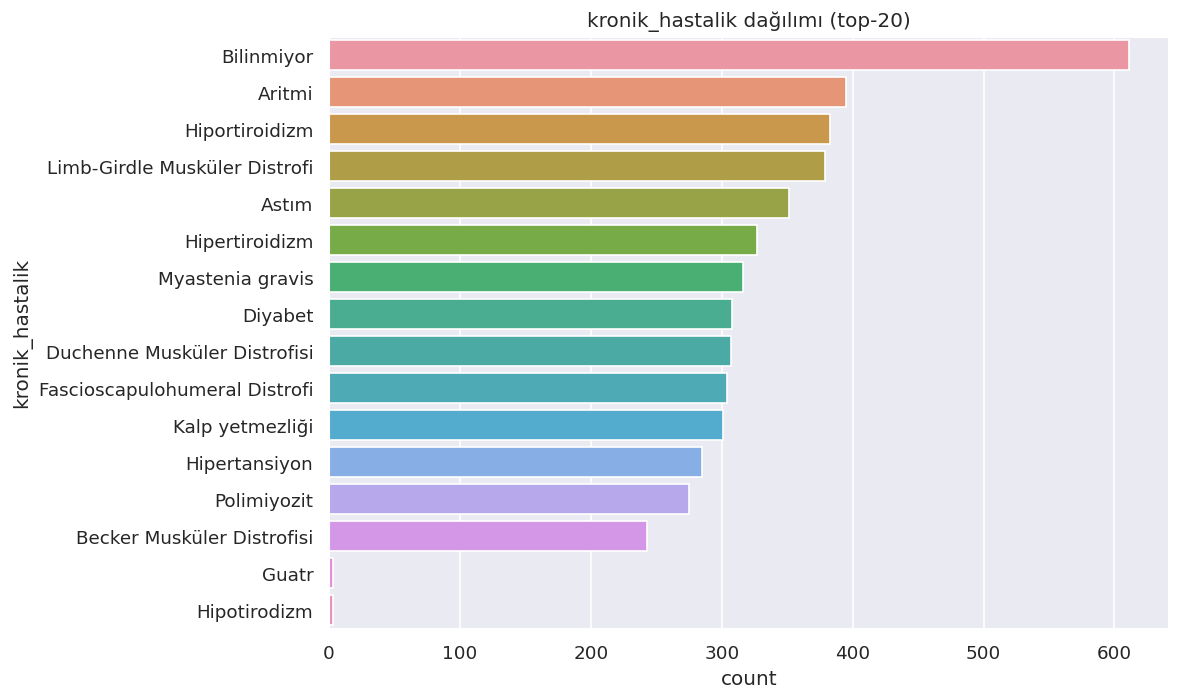

,count,mean
kronik_hastalik,,
Bilinmiyor,611,14.82
Aritmi,395,14.35
Hiportiroidizm,383,14.61
Limb-Girdle Musküler Distrofi,379,14.22
Astım,351,14.90
Hipertiroidizm,327,14.72
Myastenia gravis,316,15.01
Diyabet,308,13.82
Duchenne Musküler Distrofisi,307,14.92


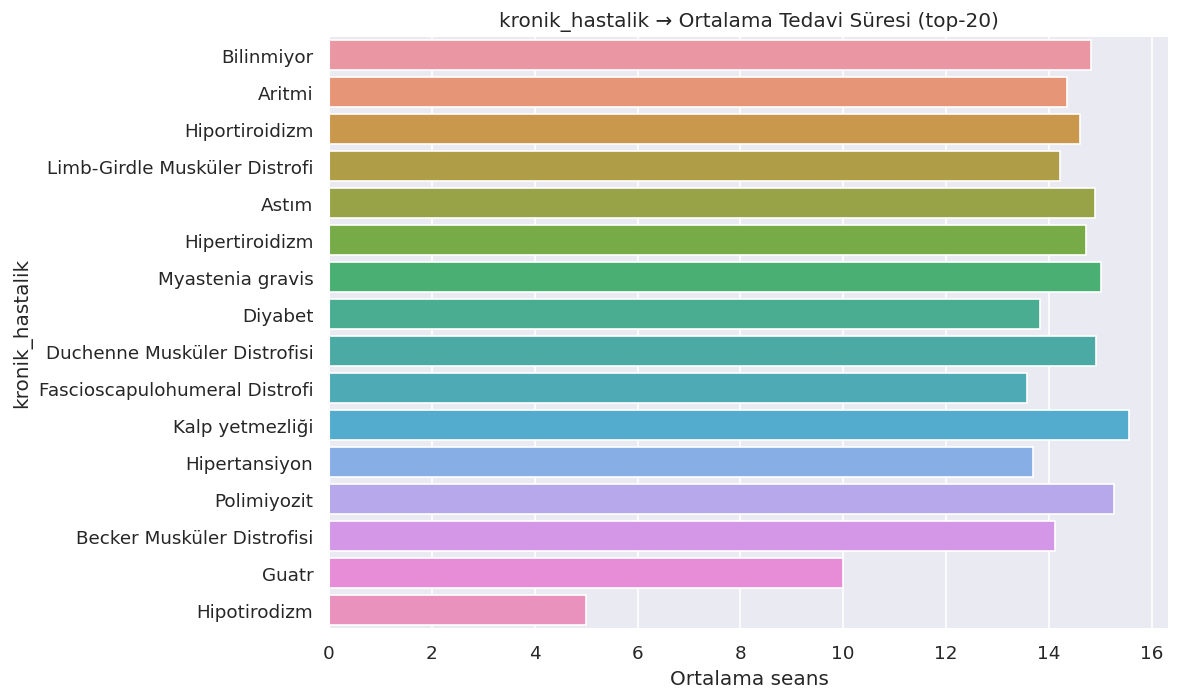

,alerji,count
0,Bilinmiyor,944
1,Polen,330
2,POLEN,170
3,Toz,138
4,TOZ,121
5,NOVALGIN,110
6,CORASPIN,102
7,ARVELES,102
8,Sucuk,96
9,Yer Fıstığı,83


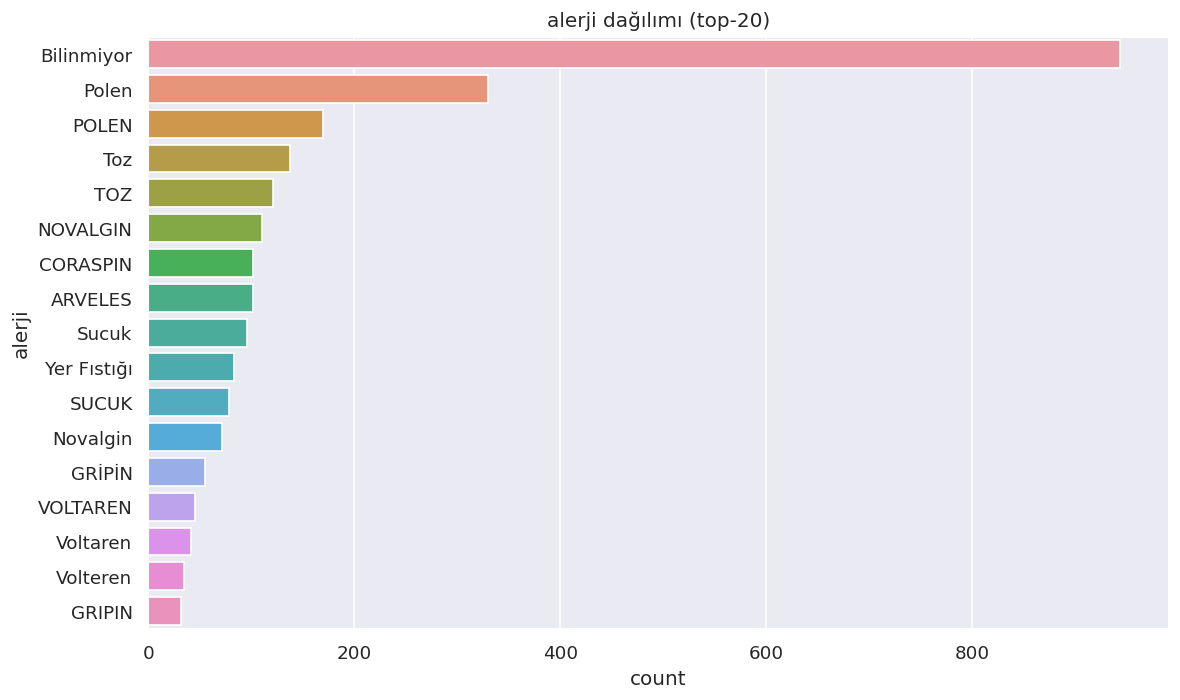

,count,mean
alerji,,
Bilinmiyor,944,14.87
Polen,330,14.76
POLEN,170,14.95
Toz,138,14.80
TOZ,121,13.65
NOVALGIN,110,13.62
ARVELES,102,13.11
CORASPIN,102,13.11
Sucuk,96,14.32


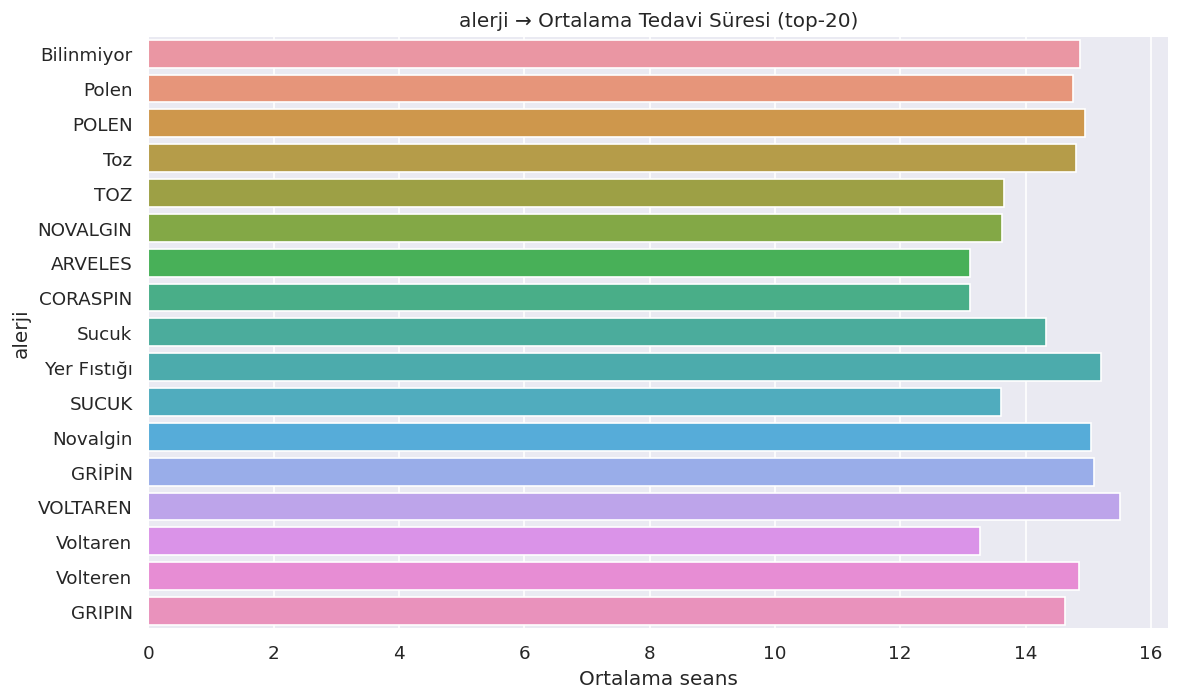

,tanilar,count
0,DORSALJİ,695
1,DİĞER,676
2,tanımlanmamış,408
3,Omuzun darbe sendromu,272
4,İntervertebral disk bozuklukları,269
5,LUMBOSAKRAL BÖLGE,265
6,SERVİKOTORASİK BÖLGE,211
7,SERVİKAL BÖLGE,148
8,Eklem ağrısı,113
9,Dorsalji,105


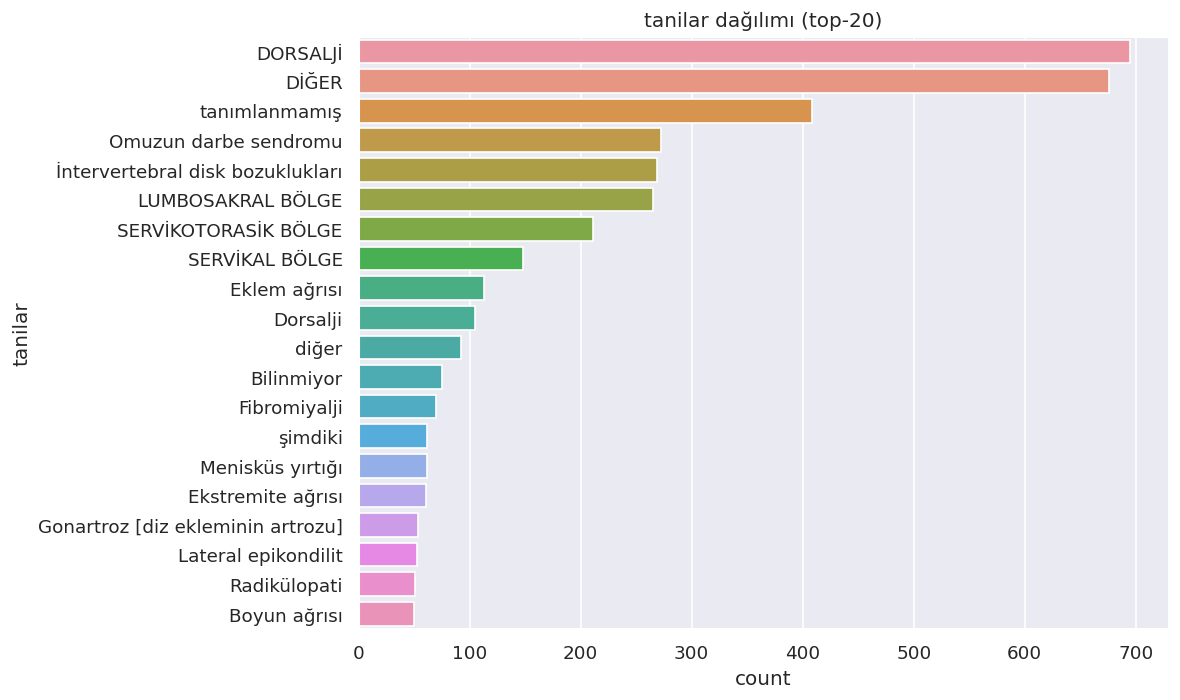

,count,mean
tanilar,,
DORSALJİ,695,15.31
DİĞER,676,15.38
tanımlanmamış,408,14.71
Omuzun darbe sendromu,272,15.02
İntervertebral disk bozuklukları,269,15.02
LUMBOSAKRAL BÖLGE,265,15.87
SERVİKOTORASİK BÖLGE,211,15.03
SERVİKAL BÖLGE,148,14.76
Eklem ağrısı,113,15.00


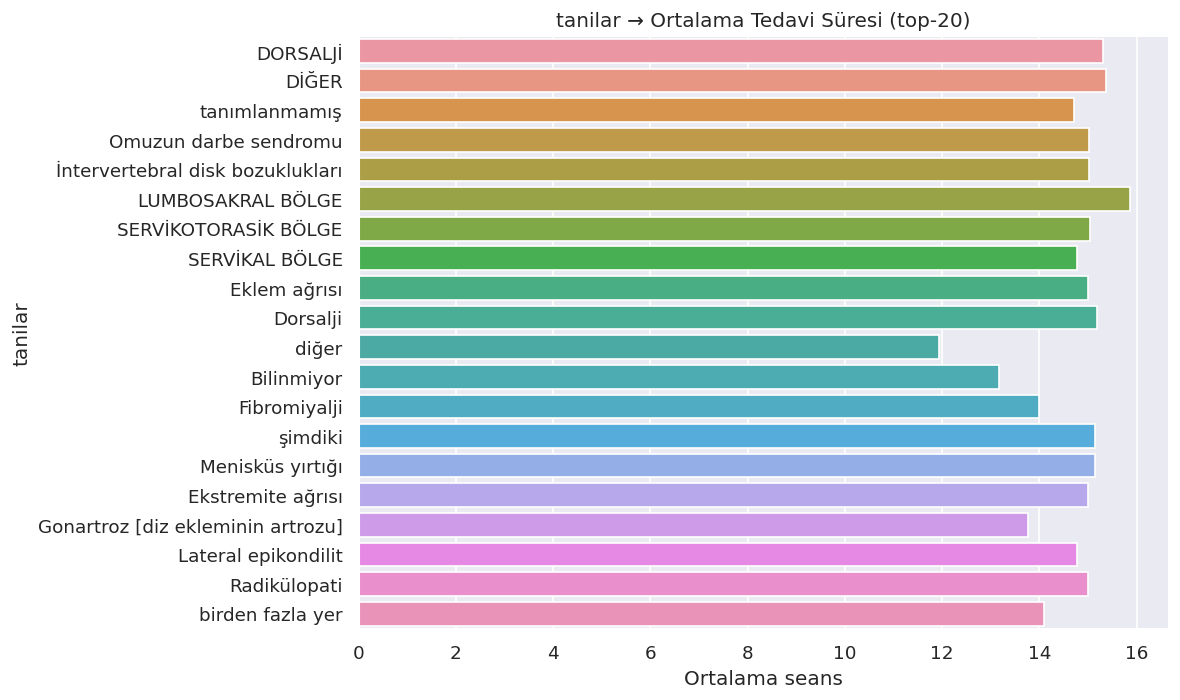

,uygulama_yerleri,count
0,Bel,543
1,Boyun,388
2,Bilinmiyor,221
3,Diz,177
4,Sol Omuz Bölgesi,140
5,Sağ Omuz Bölgesi,132
6,Sırt,96
7,Sol El Bilek Bölgesi,86
8,Sağ Ayak Bileği Bölgesi,68
9,Sol Ayak Bileği Bölgesi,65


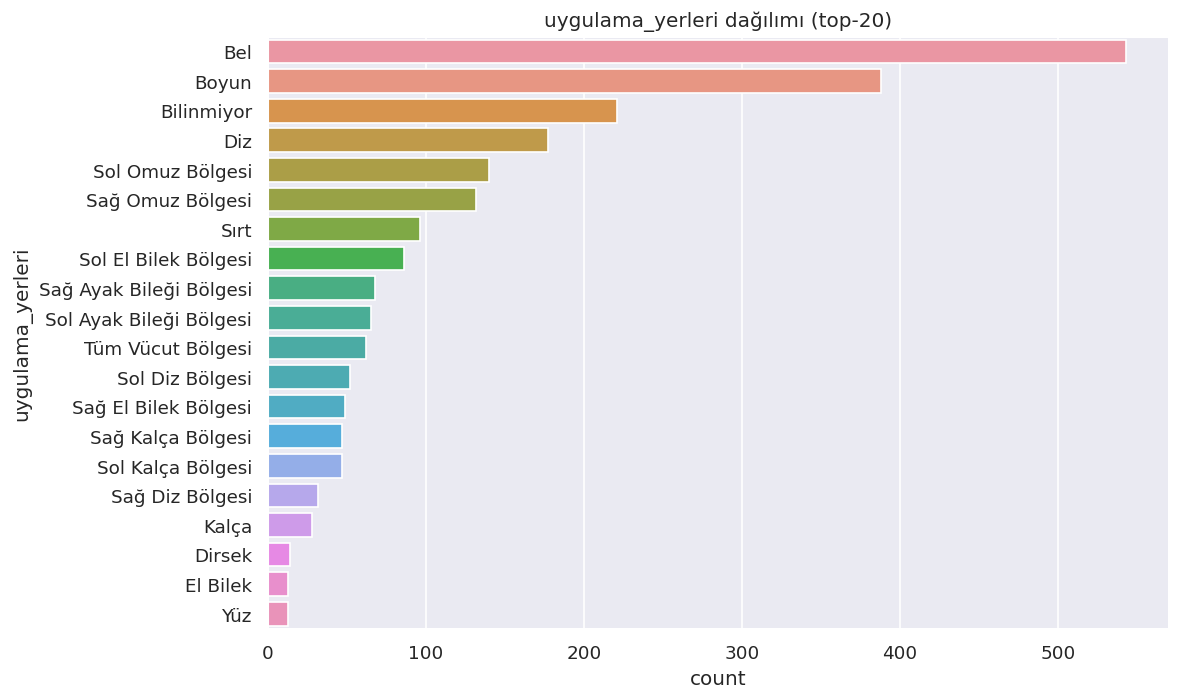

,count,mean
uygulama_yerleri,,
Bel,543,15.15
Boyun,388,15.04
Bilinmiyor,221,13.68
Diz,177,15.14
Sol Omuz Bölgesi,140,14.90
Sağ Omuz Bölgesi,132,14.98
Sırt,96,14.80
Sol El Bilek Bölgesi,86,14.13
Sağ Ayak Bileği Bölgesi,68,15.28


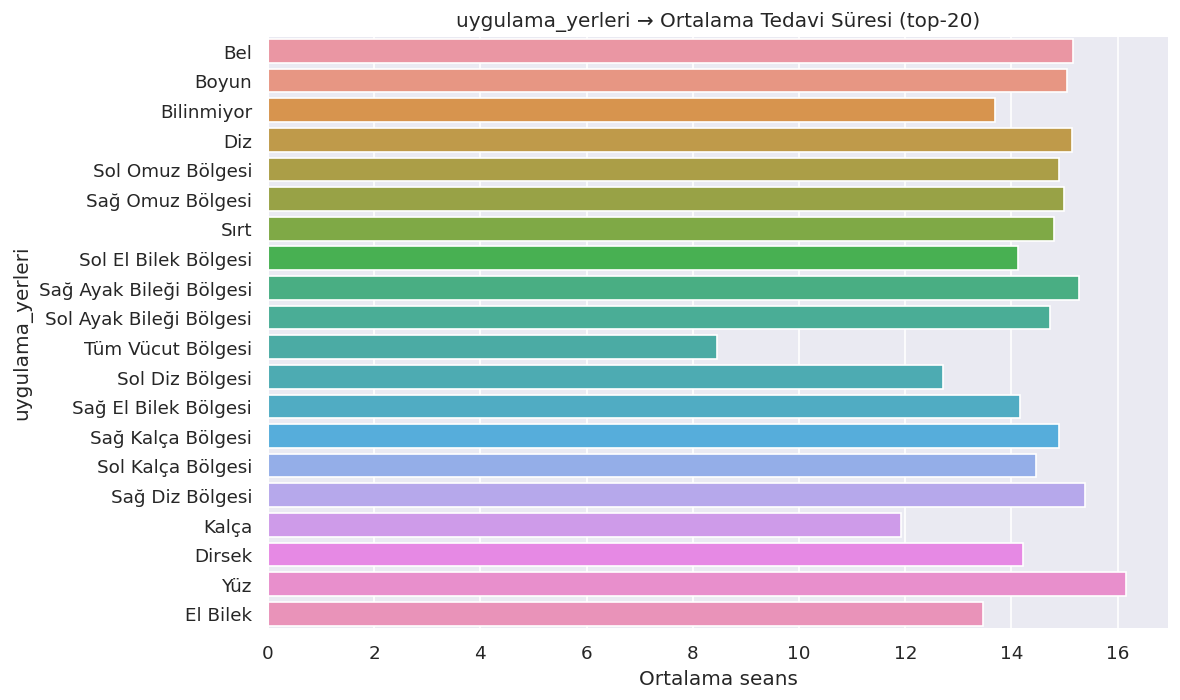

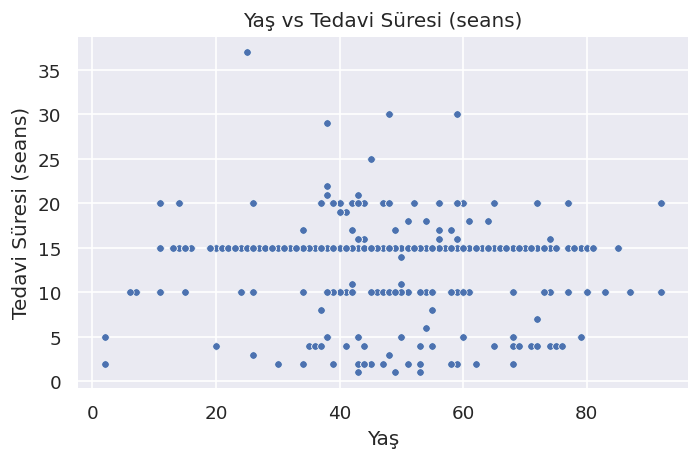

cinsiyet
Bilinmiyor    13.83
Erkek         14.41
Kadın         14.77
Name: tedavi_suresi, dtype: float64

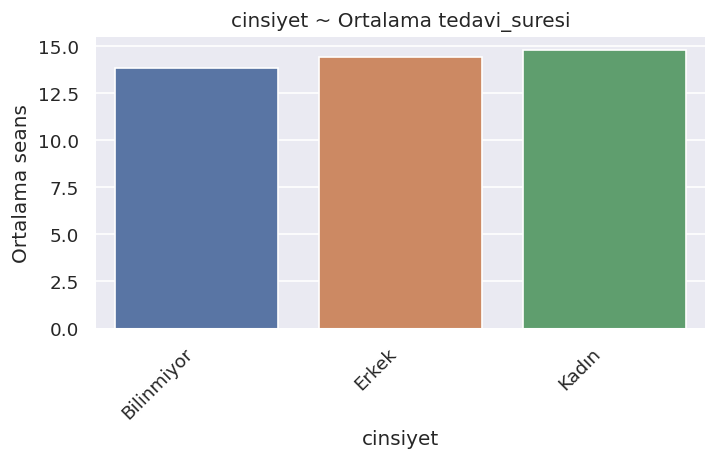

kan_grubu
A Rh+         14.00
A Rh-         14.02
B Rh-         14.18
0 Rh-         14.23
AB Rh+        14.35
0 Rh+         14.41
B Rh+         14.77
AB Rh-        15.00
Bilinmiyor    15.22
Name: tedavi_suresi, dtype: float64

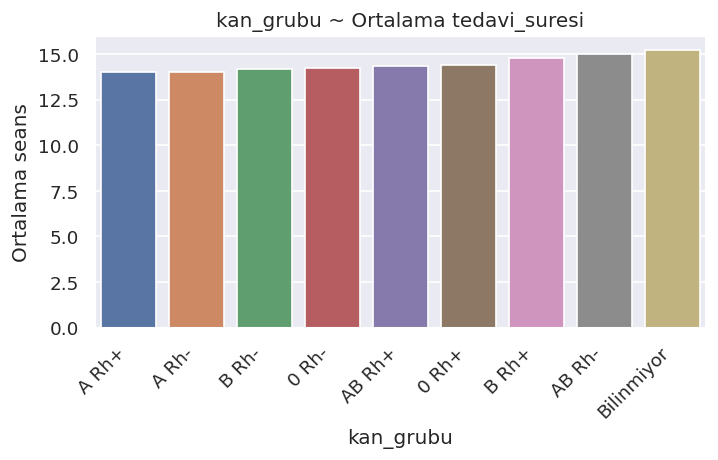


=== Kan grubu -> Tedavi süresi (seans) ===


,count,mean,median
kan_grubu_,,,
Bilinmiyor,675,15.22,15.0
0 Rh+,579,14.41,15.0
A Rh+,540,14.00,15.0
B Rh+,206,14.77,15.0
AB Rh+,80,14.35,15.0
B Rh-,68,14.18,15.0
A Rh-,53,14.02,15.0
0 Rh-,26,14.23,15.0
AB Rh-,8,15.00,15.0


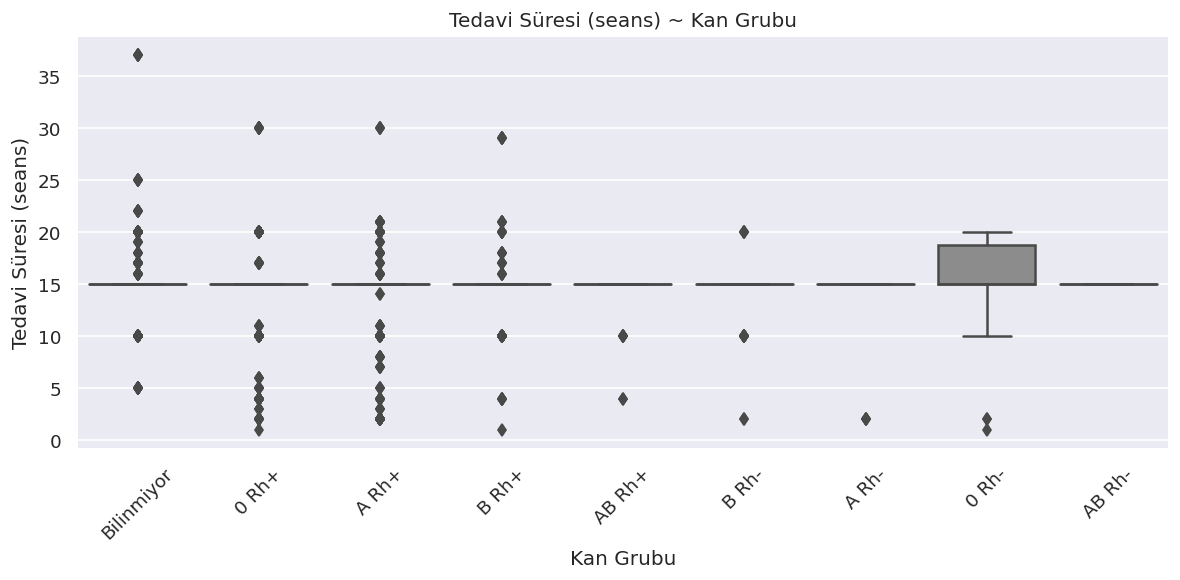


Cinsiyet × Kan Grubu → Ortalama Tedavi Süresi (seans):


kan_grubu_,0 Rh+,0 Rh-,A Rh+,A Rh-,AB Rh+,AB Rh-,B Rh+,B Rh-,Bilinmiyor
cinsiyet_,,,,,,,,,
Bilinmiyor,11.93,NaN,14.32,15.00,NaN,NaN,15.00,15.00,14.20
Erkek,13.92,12.00,13.13,15.00,13.33,15.0,15.30,13.60,15.36
Kadın,14.95,16.14,14.41,12.74,14.65,15.0,14.34,14.19,15.31


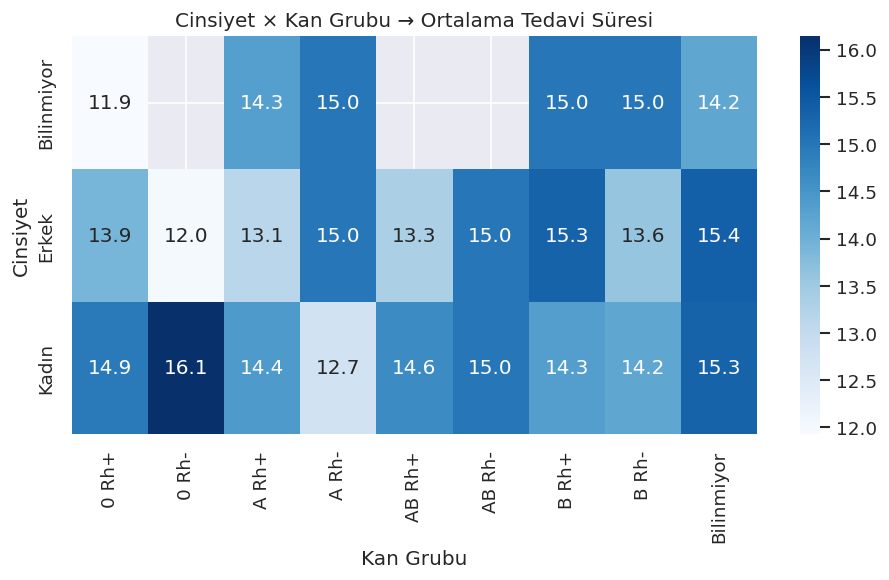


Cinsiyet × Yaş Grubu → Ortalama Tedavi Süresi (seans):


yas_grup,Genç,Orta,Yaşlı
cinsiyet_,,,
Bilinmiyor,15.00,14.06,12.40
Erkek,14.11,14.81,13.93
Kadın,13.95,15.16,14.52


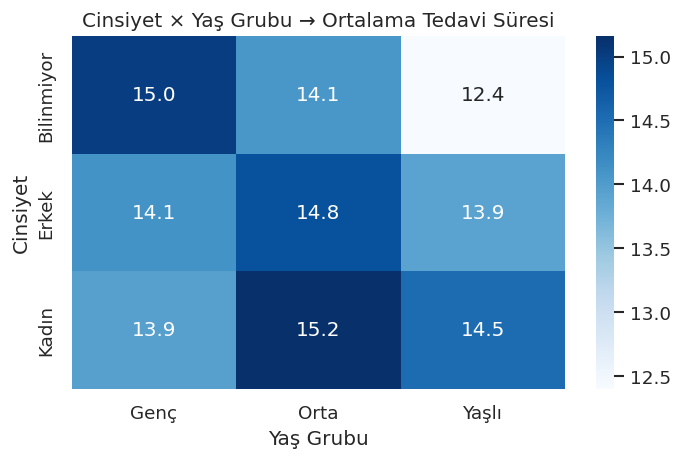

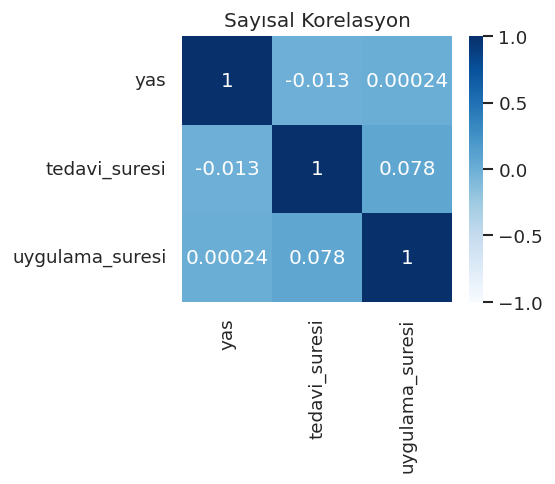


[OHE] Tekil kategorikler ~ tedavi_suresi korelasyon (Top-30 |abs|):


,corr
bolum_Ortopedi Ve Travmatoloji,-0.530
"bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",0.498
tedavi_adi_Parapleji-Tetrapleji,0.248
tedavi_adi_Diz Op-Erken Rehabilitasyon,-0.205
tedavi_adi_Travmatik beyin yaralanması,0.175
bolum_Bilinmiyor,0.171
uyruk_Tokelau,0.167
bolum_İç Hastalıkları,-0.166
tedavi_adi_Patella kırığı,-0.163
"tedavi_adi_Diz Menisküs,",-0.120


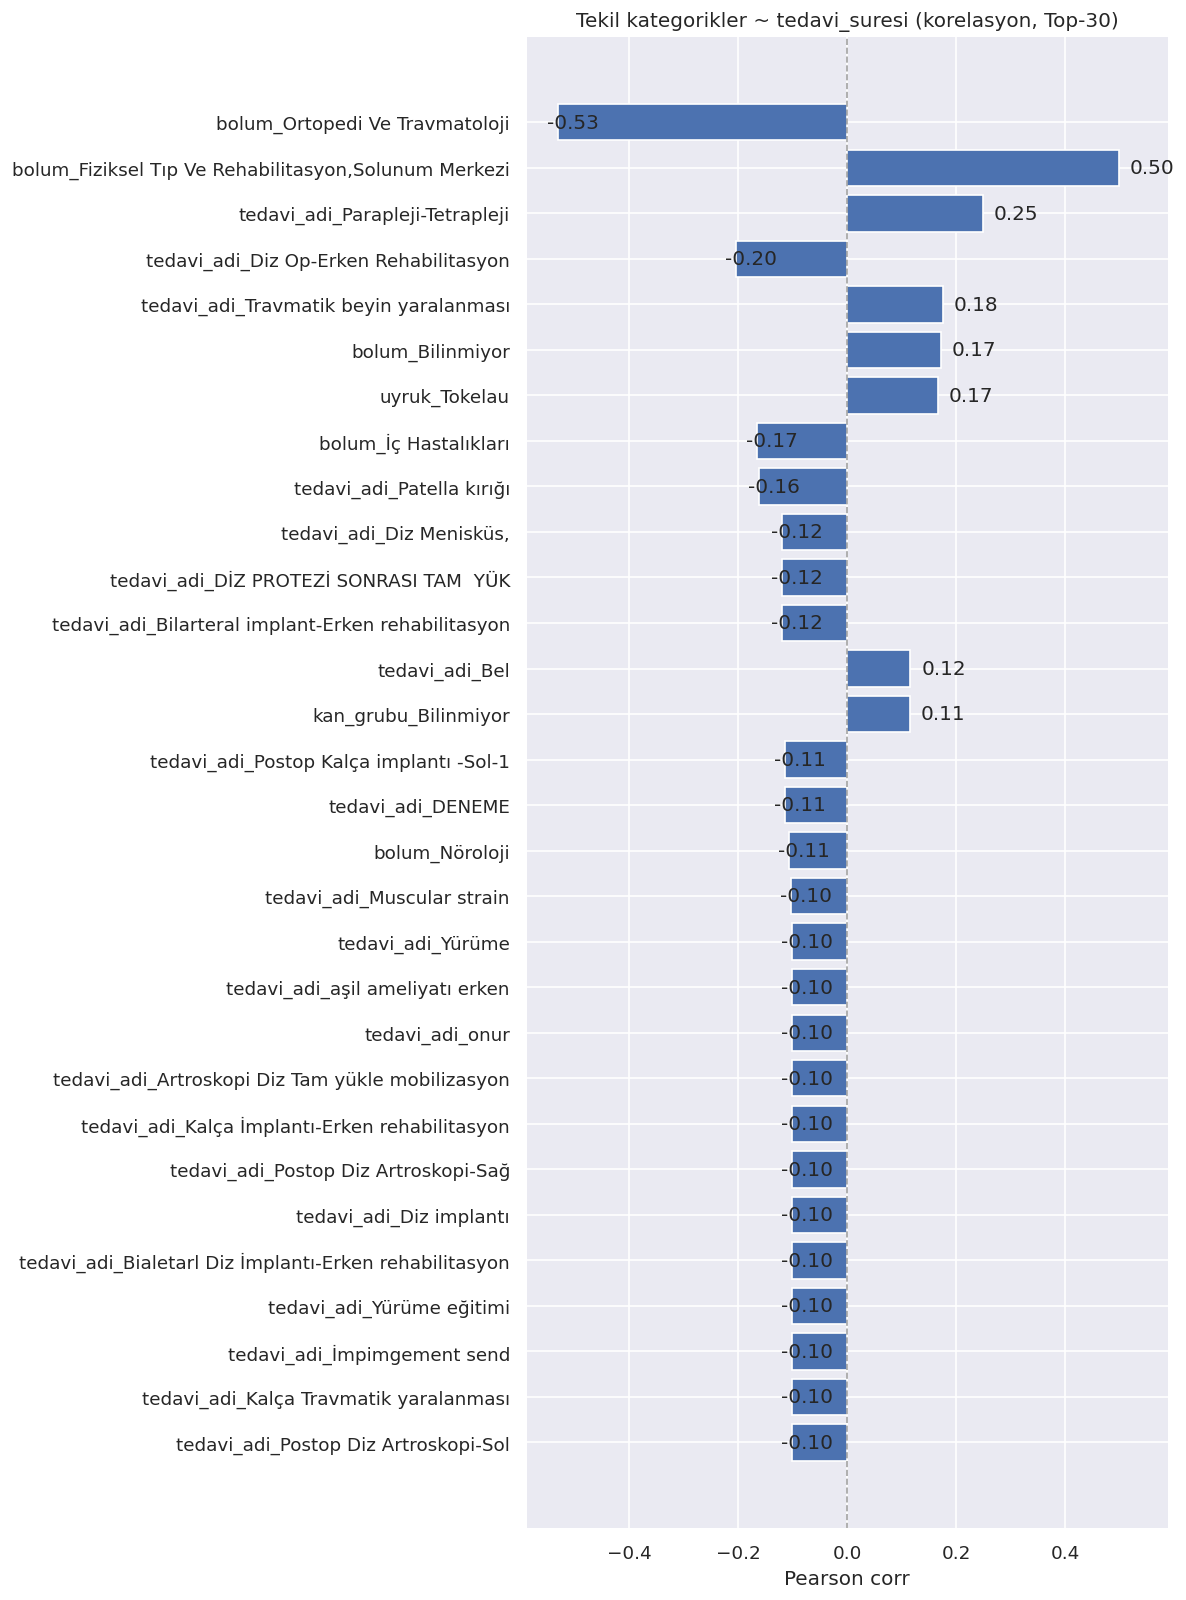


[kronik_hastalik] token ~ tedavi_suresi korelasyon (Top-13 |abs|):


,corr
Fascioscapulohumeral Distrofi,-0.106
Kalp yetmezliği,0.104
Hipertansiyon,-0.090
Diyabet,-0.080
Polimiyozit,0.069
Myastenia gravis,0.048
Limb-Girdle Musküler Distrofi,-0.042
Becker Musküler Distrofisi,-0.042
Astım,0.039
Duchenne Musküler Distrofisi,0.037


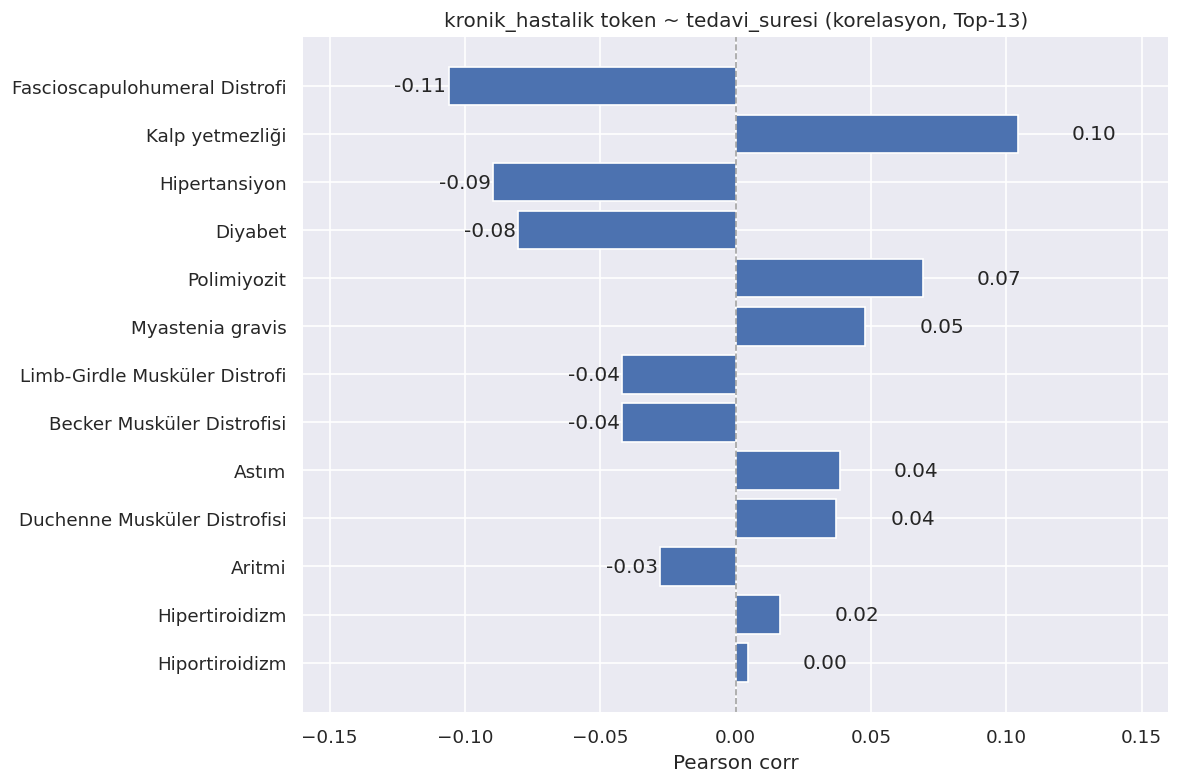

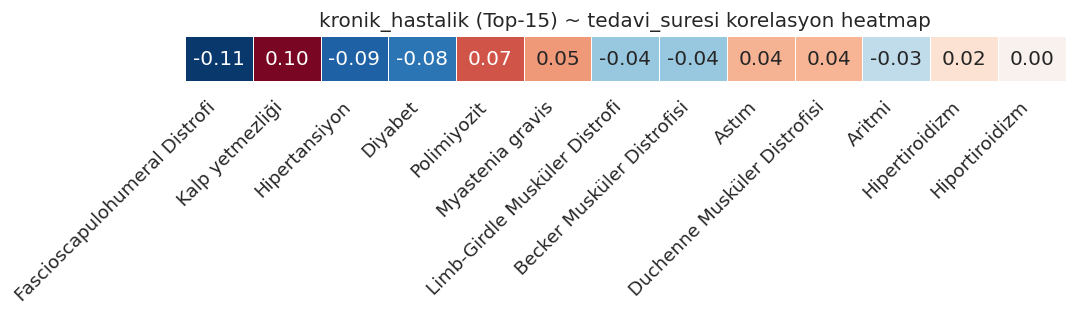


[tanilar] token ~ tedavi_suresi korelasyon (Top-25 |abs|):


,corr
DİĞER,0.154
diğer,-0.146
DORSALJİ,0.141
LUMBOSAKRAL BÖLGE,0.128
Diz (anterior) (posterior) çapraz ligament burkulma ve gerilmesi,0.111
Vitamin D eksikliği,-0.105
Eklemin kontraktürü,-0.045
Omuzun darbe sendromu,0.045
İntervertebral disk bozuklukları,0.044
SERVİKOTORASİK BÖLGE,0.040


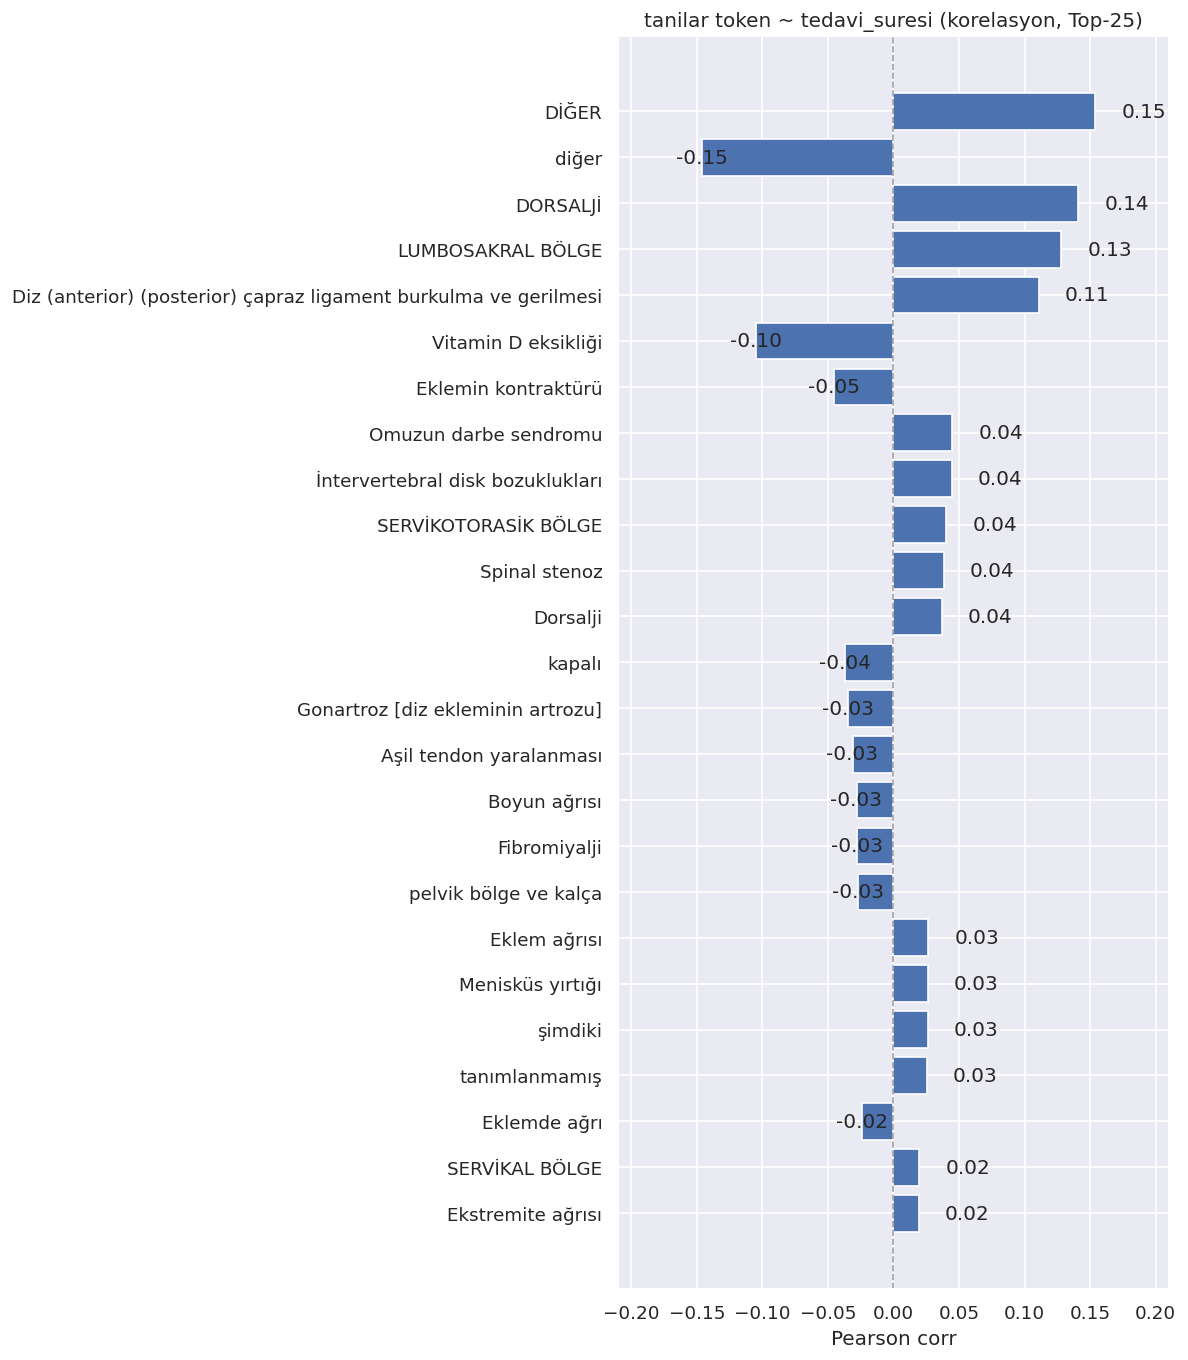

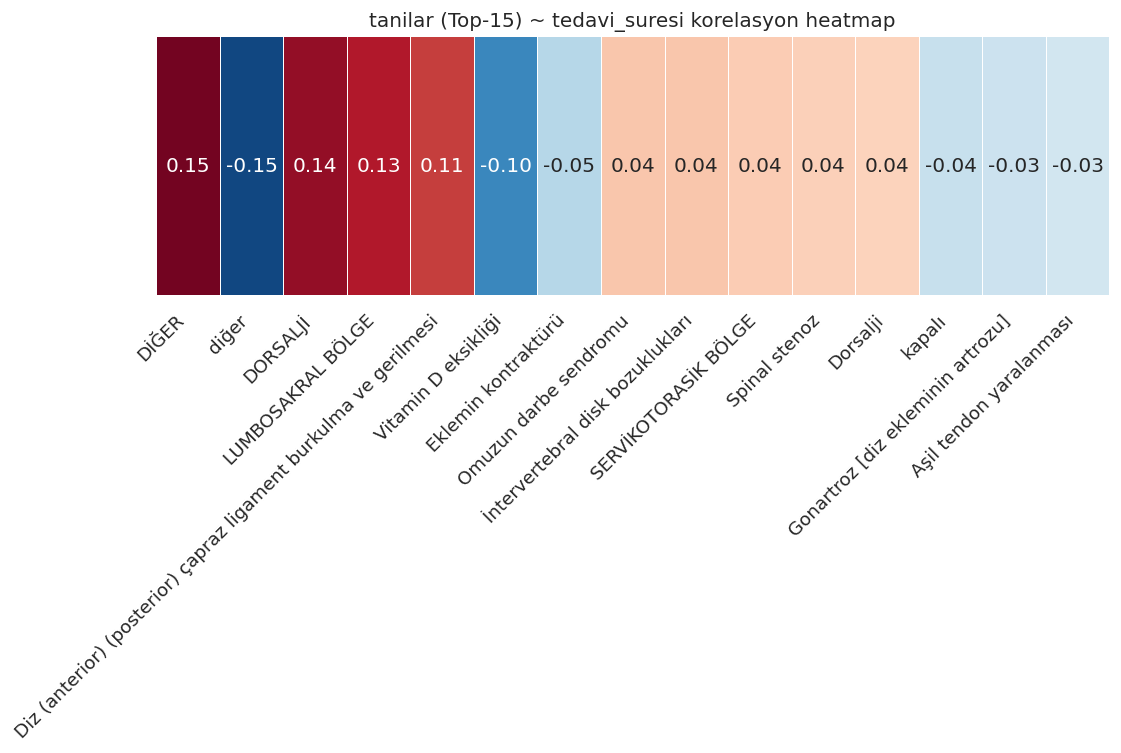


[alerji] token ~ tedavi_suresi korelasyon (Top-16 |abs|):


,corr
ARVELES,-0.086
CORASPIN,-0.086
TOZ,-0.059
NOVALGIN,-0.058
SUCUK,-0.049
Voltaren,-0.048
VOLTAREN,0.036
Yer Fıstığı,0.033
POLEN,0.029
Novalgin,0.023


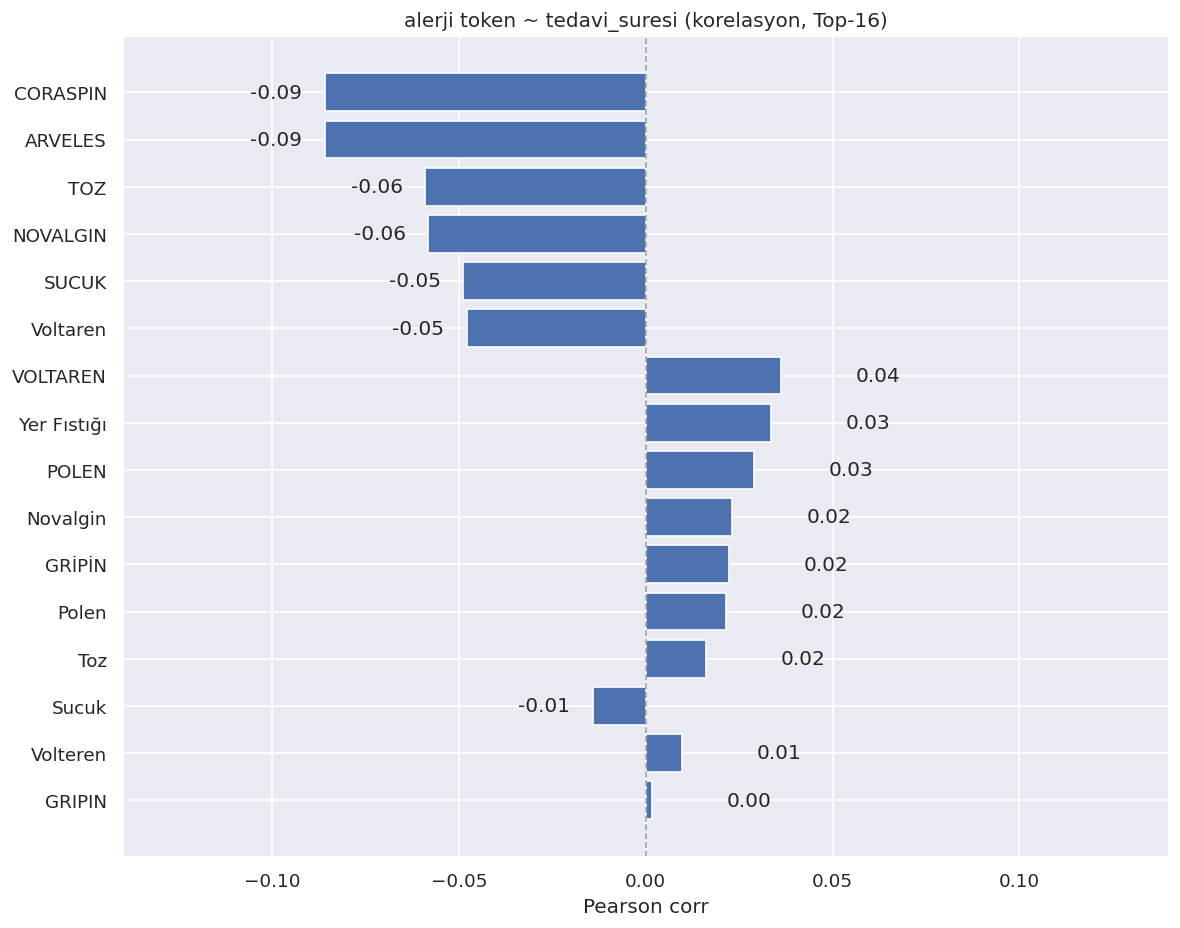

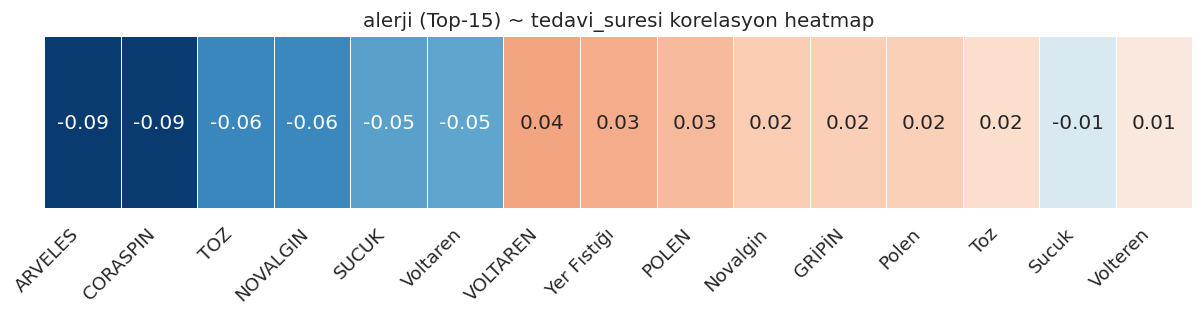


[uygulama_yerleri] token ~ tedavi_suresi korelasyon (Top-16 |abs|):


,corr
Tüm Vücut Bölgesi,-0.278
Bel,0.089
Kalça,-0.080
Sol Diz Bölgesi,-0.077
Boyun,0.058
Diz,0.045
Sağ Ayak Bileği Bölgesi,0.034
Sağ Omuz Bölgesi,0.028
Sağ Diz Bölgesi,0.026
Sol El Bilek Bölgesi,-0.024


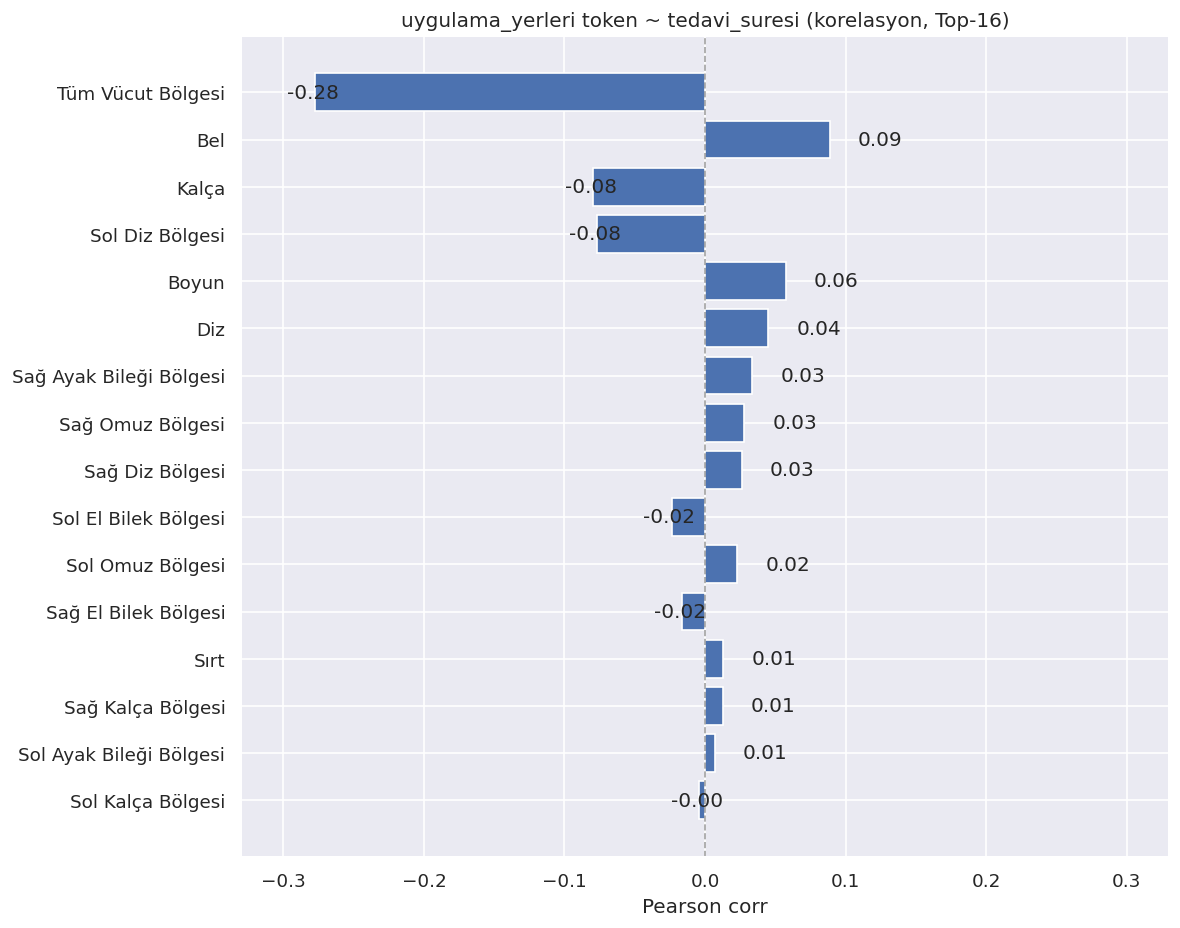

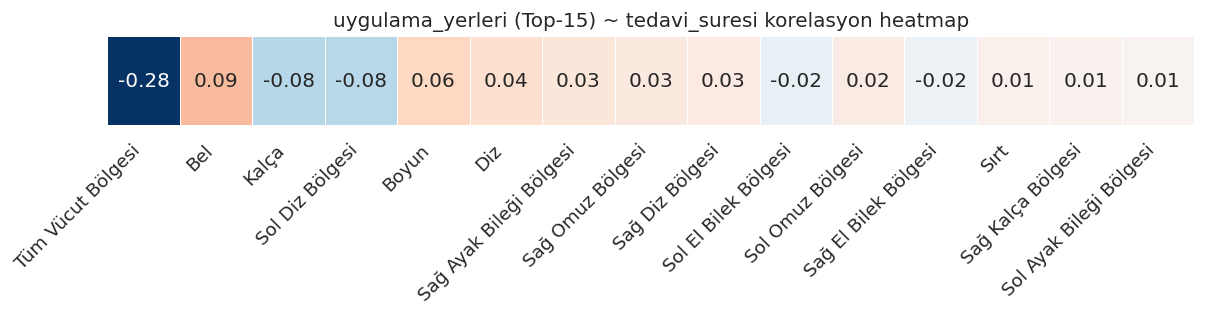

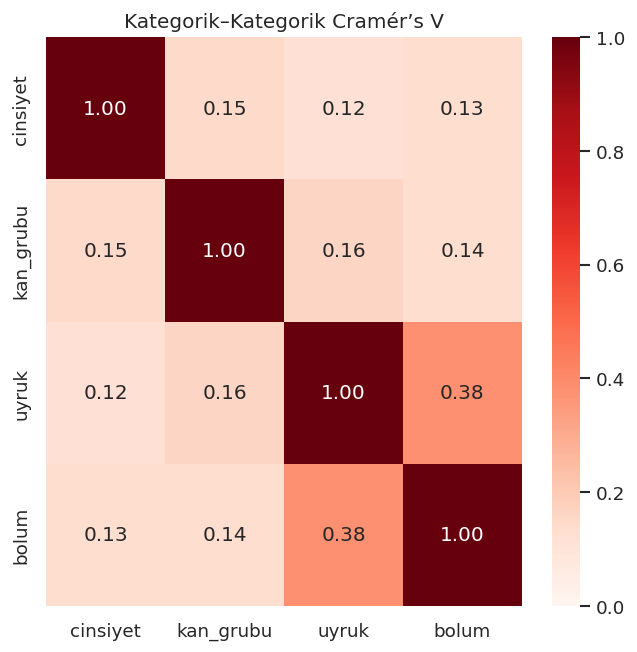


— Kan grubu EKSİK olanlarda Yaş dağılımı —


count    675.000000
mean      44.250370
std       13.708641
min        7.000000
25%       37.000000
50%       44.000000
75%       52.500000
max       87.000000
Name: yas, dtype: float64


— Kan grubu EKSİK olanlarda Cinsiyet dağılımı —


cinsiyet
Kadın    315
Erkek    289
NaN       71
Name: count, dtype: int64


— Kan grubu DOLU olanlarda Yaş dağılımı —


count    1560.000000
mean       48.658333
std        15.631109
min         2.000000
25%        40.000000
50%        48.000000
75%        59.000000
max        92.000000
Name: yas, dtype: float64


— Kan grubu DOLU olanlarda Cinsiyet dağılımı —


cinsiyet
Kadın    959
Erkek    503
NaN       98
Name: count, dtype: int64

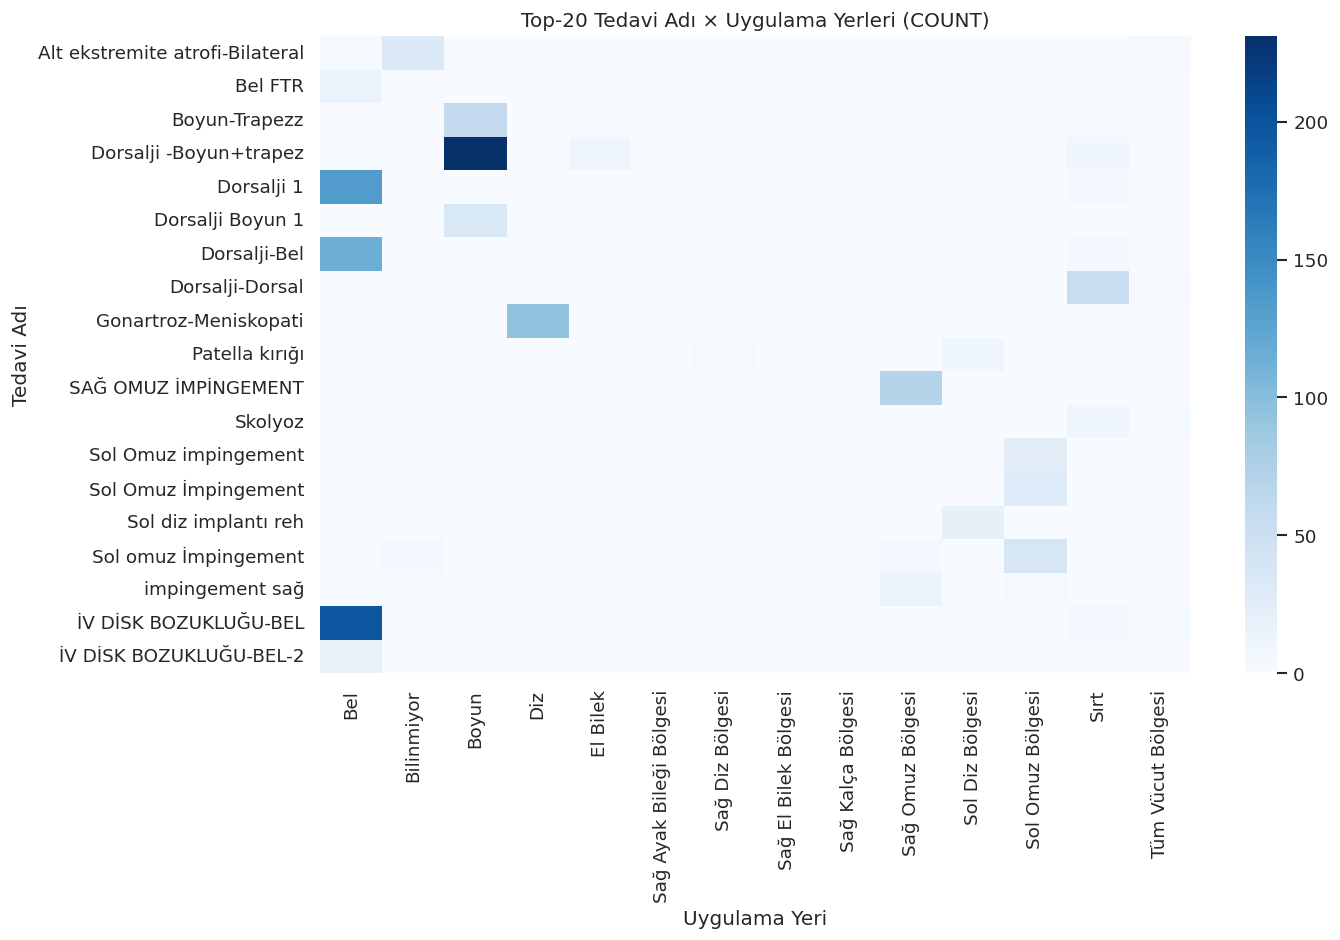

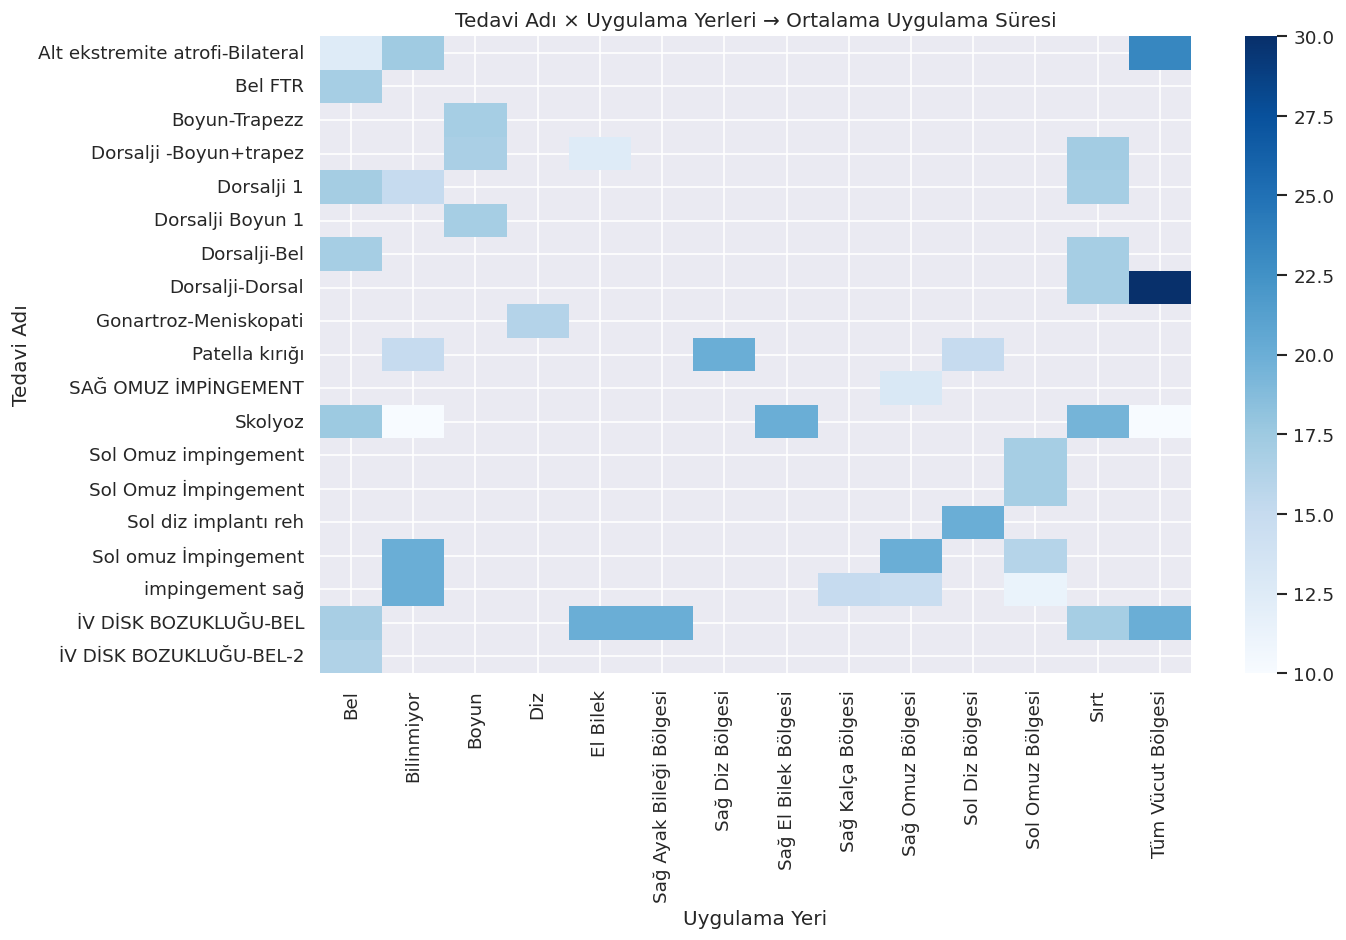


— Sadece 'Boyun' yazılı (Boyun+trapez+skapular tedavisi) satırlar —


,hasta_no,tedavi_adi,uygulama_yerleri,uygulama_suresi
1,145135,Dorsalji -Boyun+trapez+skapular,Boyun,20
3,145135,Dorsalji -Boyun+trapez+skapular,Boyun,5
5,145135,Dorsalji -Boyun+trapez+skapular,Boyun,20



— Olası duplicate ilk 20 satır —


,hasta_no,yas,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,tedavi_suresi,uygulama_yerleri,uygulama_suresi
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10,NaN,30
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10,NaN,20
8,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10,NaN,20
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Distrofisi, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15,Sol El Bilek Bölgesi,15
10,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Distrofisi, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15,Sol El Bilek Bölgesi,20



— Basit mantık kontrolleri —


yas_out_of_range        0
tedavi_suresi_null      0
uygulama_suresi_null    0
dtype: int64

In [14]:
sns.set_theme()
plt.rcParams["figure.dpi"] = 120
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 120)


# Yardımcılar

def fill_cat(s, null_label="Bilinmiyor"):
    """Grafikler/korelasyon için NaN ve boş stringleri tek etikete indir."""
    return (
        s.astype("string")
         .str.strip()
         .replace("", pd.NA)
         .fillna(null_label)
    )

def split_multi(x):
    """Virgüllü/Listedeki değerleri temiz listeye çevir."""
    if isinstance(x, list):
        return [t.strip() for t in x if str(t).strip() != ""]
    if pd.isna(x):
        return []
    return [t.strip() for t in str(x).split(",") if t.strip() != ""]


# >>> EK: ÇİZİM YARDIMCILARI (görselliği düzeltir) <<<
def plot_corr_bars(series, title):
    """Korelasyonları simetrik eksen ve etiketle gösteren barplot."""
    s = series.dropna().sort_values(key=lambda x: x.abs(), ascending=True)
    max_abs = float(np.ceil(s.abs().max() * 100) / 100) or 0.01
    fig_h = max(2.5, 0.4 * len(s) + 1.5)
    fig, ax = plt.subplots(figsize=(10, fig_h))
    ax.barh(s.index, s.values)
    ax.axvline(0, ls="--", lw=1, color="k", alpha=.4)
    ax.set_xlim(-max_abs - 0.05, max_abs + 0.05)
    ax.set_title(title); ax.set_xlabel("Pearson corr"); ax.set_ylabel("")
    for y, v in enumerate(s.values):
        ax.text(v + (0.02 if v >= 0 else -0.02), y, f"{v:.2f}", va="center")
    plt.tight_layout(); plt.show()

def plot_corr_heatmap(series, title, top_n=15):
    """Tek satırlık heatmap'i kontrastlı ve okunur çizer (merkez=0)."""
    s = series.dropna().head(top_n)
    max_abs = float(np.ceil(s.abs().max() * 100) / 100) or 0.01
    data = s.to_frame("corr")
    w = max(6, 0.55 * len(s) + 2)
    plt.figure(figsize=(w, 2.8))
    sns.heatmap(
        data.T, annot=True, fmt=".2f",
        cmap="RdBu_r", center=0, vmin=-max_abs, vmax=max_abs,
        cbar=False, linewidths=.5, linecolor="white"
    )
    plt.title(title); plt.yticks([]); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()


# TEMEL EDA

df_plot = df.copy()

# ---- 1) Sayısal dağılımlar (hist + box)
num_cols = [c for c in ["yas", "tedavi_suresi", "uygulama_suresi"] if c in df_plot.columns]
for c in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(df_plot[c].dropna(), kde=True, ax=ax)
    ax.set_title(f"{c} dağılımı"); ax.set_xlabel(c)
    plt.tight_layout(); plt.show()

    fig, ax = plt.subplots(figsize=(4,4))
    sns.boxplot(y=df_plot[c], ax=ax)
    ax.set_title(f"{c} boxplot (aykırılar)"); ax.set_ylabel(c)
    plt.tight_layout(); plt.show()

# ---- 2) Tekil kategorik dağılımlar (top-15)
cat_cols = [c for c in ["cinsiyet","kan_grubu","uyruk","bolum","tedavi_adi","tanilar"] if c in df_plot.columns]
for c in cat_cols:
    s = fill_cat(df_plot[c])
    vc = s.value_counts().head(15)
    display(pd.DataFrame({c: vc.index, "count": vc.values}))

    fig, ax = plt.subplots(figsize=(12,5))
    g = sns.countplot(x=s, order=vc.index, ax=ax)
    ax.set_title(f"{c} dağılımı (top-15)")
    ax.set_xlabel(c); ax.set_ylabel("")
    plt.xticks(rotation=45, ha="right")
    for container in g.containers:
        ax.bar_label(container, fmt="%d", label_type="edge", fontsize=9)
    ax.yaxis.set_ticks([])
    plt.tight_layout(); plt.show()

# ---- 3) Çoklu-değer kolonlar: dağılım + (varsa) ortalama tedavi_suresi
multi_cols = [c for c in ["kronik_hastalik","alerji","tanilar","uygulama_yerleri"] if c in df_plot.columns]
for c in multi_cols:
    ex = df_plot.copy()
    ex[c] = ex[c].apply(split_multi)
    ex = ex.explode(c, ignore_index=False)
    ex[c] = fill_cat(ex[c])

    # COUNT (top-20)
    vc = ex[c].value_counts().head(20)
    display(pd.DataFrame({c: vc.index, "count": vc.values}))
    plt.figure(figsize=(10,6))
    sns.barplot(y=vc.index, x=vc.values, orient="h")
    plt.title(f"{c} dağılımı (top-20)")
    plt.xlabel("count"); plt.ylabel(c)
    plt.tight_layout(); plt.show()

    # Ortalama tedavi süresi (top-20 sıklığa göre)
    if "tedavi_suresi" in ex.columns:
        tab = (ex.groupby(c)["tedavi_suresi"]
                 .agg(count="count", mean="mean")
                 .sort_values("count", ascending=False)
                 .head(20))
        display(tab.round(2))
        plt.figure(figsize=(10,6))
        sns.barplot(y=tab.index, x=tab["mean"], orient="h")
        plt.title(f"{c} → Ortalama Tedavi Süresi (top-20)")
        plt.xlabel("Ortalama seans"); plt.ylabel(c)
        plt.tight_layout(); plt.show()

# ---- 4) Hedefle basit ilişkiler
if {"yas","tedavi_suresi"}.issubset(df_plot.columns):
    fig, ax = plt.subplots(figsize=(6,4))
    sns.scatterplot(x="yas", y="tedavi_suresi", data=df_plot, s=20, ax=ax)
    ax.set_title("Yaş vs Tedavi Süresi (seans)")
    ax.set_xlabel("Yaş"); ax.set_ylabel("Tedavi Süresi (seans)")
    plt.tight_layout(); plt.show()

for c in ["cinsiyet","kan_grubu"]:
    if {c,"tedavi_suresi"}.issubset(df_plot.columns):
        s = fill_cat(df_plot[c])
        grp = df_plot.groupby(s)["tedavi_suresi"].mean().sort_values()
        display(grp.round(2))
        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x=grp.index, y=grp.values, ax=ax)
        ax.set_title(f"{c} ~ Ortalama tedavi_suresi")
        ax.set_ylabel("Ortalama seans"); ax.set_xlabel(c)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout(); plt.show()

# ---- 4.1) Kan grubu → tedavi süresi (özet tablo + boxplot)
if {"kan_grubu","tedavi_suresi"}.issubset(df_plot.columns):
    kg = fill_cat(df_plot["kan_grubu"])
    tablo = (
        df_plot.assign(kan_grubu_=kg)
               .groupby("kan_grubu_")["tedavi_suresi"]
               .agg(count="count", mean="mean", median="median")
               .round(2)
               .sort_values("count", ascending=False)
    )
    print("\n=== Kan grubu -> Tedavi süresi (seans) ===")
    display(tablo)

    plt.figure(figsize=(10,5))
    order = kg.value_counts().index
    sns.boxplot(x=kg, y=df_plot["tedavi_suresi"], order=order)
    plt.xticks(rotation=45)
    plt.title("Tedavi Süresi (seans) ~ Kan Grubu")
    plt.xlabel("Kan Grubu"); plt.ylabel("Tedavi Süresi (seans)")
    plt.tight_layout(); plt.show()

# ---- 10) Cinsiyet × Kan grubu ve Cinsiyet × Yaş (bin) → Ortalama tedavi süresi
if {"cinsiyet","kan_grubu","tedavi_suresi"}.issubset(df_plot.columns):
    ck = pd.pivot_table(df_plot.assign(cinsiyet_=fill_cat(df_plot["cinsiyet"]),
                                       kan_grubu_=fill_cat(df_plot["kan_grubu"])),
                        index="cinsiyet_", columns="kan_grubu_",
                        values="tedavi_suresi", aggfunc="mean")
    print("\nCinsiyet × Kan Grubu → Ortalama Tedavi Süresi (seans):"); display(ck.round(2))
    plt.figure(figsize=(8,5)); sns.heatmap(ck, annot=True, fmt=".1f", cmap="Blues")
    plt.title("Cinsiyet × Kan Grubu → Ortalama Tedavi Süresi")
    plt.xlabel("Kan Grubu"); plt.ylabel("Cinsiyet"); plt.tight_layout(); plt.show()

if {"cinsiyet","yas","tedavi_suresi"}.issubset(df_plot.columns):
    tmp = df_plot.copy()
    tmp["yas_grup"] = pd.cut(tmp["yas"], bins=[0,30,50,120], labels=["Genç","Orta","Yaşlı"], right=False)
    cy = pd.pivot_table(tmp.assign(cinsiyet_=fill_cat(tmp["cinsiyet"])),
                        index="cinsiyet_", columns="yas_grup",
                        values="tedavi_suresi", aggfunc="mean")
    print("\nCinsiyet × Yaş Grubu → Ortalama Tedavi Süresi (seans):"); display(cy.round(2))
    plt.figure(figsize=(6,4)); sns.heatmap(cy, annot=True, fmt=".1f", cmap="Blues")
    plt.title("Cinsiyet × Yaş Grubu → Ortalama Tedavi Süresi")
    plt.xlabel("Yaş Grubu"); plt.ylabel("Cinsiyet"); plt.tight_layout(); plt.show()        

# ---- 5) Sayısal korelasyon
if len(num_cols) >= 2:
    corr = df_plot[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(4.8,4.2))
    sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
    plt.title("Sayısal Korelasyon")
    plt.tight_layout(); plt.show()

# 12) EK KORELASYON PAKETİ

target = "tedavi_suresi"

# 12.1 Tekil kategorikler → OHE → hedefle korelasyon
single_cats = [c for c in ["cinsiyet","kan_grubu","uyruk","bolum","tedavi_adi"] if c in df_plot.columns]
single_cats = [c for c in single_cats if df_plot[c].notna().any()]

if single_cats and target in df_plot.columns:
    df_ohe_base = df_plot[[target]].copy()
    for c in single_cats:
        s = fill_cat(df_plot[c])
        d = pd.get_dummies(s, prefix=c, drop_first=False, dtype=int)
        df_ohe_base = df_ohe_base.join(d)

    corr_s = df_ohe_base.drop(columns=[target]).corrwith(df_ohe_base[target]) \
                        .sort_values(key=lambda x: x.abs(), ascending=False)

    top_k = min(30, len(corr_s))
    corr_top = corr_s.head(top_k)

    print("\n[OHE] Tekil kategorikler ~ tedavi_suresi korelasyon (Top-30 |abs|):")
    display(corr_top.to_frame("corr").round(3))

    # >>> İYİLEŞTİRİLMİŞ BARPLOT <<<
    plot_corr_bars(corr_top, "Tekil kategorikler ~ tedavi_suresi (korelasyon, Top-30)")

# 12.2 Çoklu-değer kolonlar → token 1/0 → hedefle korelasyon
multi_cols = [c for c in ["kronik_hastalik","tanilar","alerji","uygulama_yerleri"] if c in df_plot.columns]
for c in multi_cols:
    ex = df_plot[[target, c]].copy()
    ex[c] = ex[c].apply(split_multi)
    ex = ex.explode(c, ignore_index=False)
    ex[c] = fill_cat(ex[c])

    wide = (ex.assign(present=1)
              .pivot_table(index=ex.index, columns=c, values="present", aggfunc="max", fill_value=0))

    min_count = 20  # nadir token filtresi
    keep = [col for col, s in (wide.sum()).items() if s >= min_count and col != "Bilinmiyor"]
    if not keep:
        print(f"\n[{c}] Yeterli sıklıkta token bulunamadı (min_count={min_count}).")
        continue

    w2 = wide[keep].join(df_plot[target])
    corr_m = w2[keep].corrwith(w2[target]).sort_values(key=lambda x: x.abs(), ascending=False)

    top_k = min(25, len(corr_m))
    corr_top = corr_m.head(top_k)

    print(f"\n[{c}] token ~ {target} korelasyon (Top-{top_k} |abs|):")
    display(corr_top.to_frame("corr").round(3))

    # >>> İYİLEŞTİRİLMİŞ BARPLOT <<<
    plot_corr_bars(corr_top, f"{c} token ~ {target} (korelasyon, Top-{top_k})")

    # >>> İYİLEŞTİRİLMİŞ HEATMAP (merkez=0, simetrik sınırlar) <<<
    plot_corr_heatmap(corr_m, f"{c} (Top-15) ~ {target} korelasyon heatmap", top_n=15)

# 12.3 (Opsiyonel) Kategorik–kategorik: Cramér’s V mini-ısı haritası
def cramers_v(x, y):
    """Cramér's V (bias correction yok – case için yeterli)."""
    conf = pd.crosstab(x, y)
    from scipy.stats import chi2_contingency
    chi2 = chi2_contingency(conf, correction=False)[0]
    n = conf.values.sum()
    r, k = conf.shape
    denom = min(r-1, k-1)
    return np.sqrt((chi2 / n) / (denom if denom > 0 else 1))

try:
    cat_for_v = [c for c in ["cinsiyet","kan_grubu","uyruk","bolum","tedavi_adi"] if c in df_plot.columns]
    cat_for_v = [c for c in cat_for_v if df_plot[c].nunique(dropna=True) <= 15]

    if len(cat_for_v) >= 2:
        mat = pd.DataFrame(index=cat_for_v, columns=cat_for_v, dtype=float)
        for i, ci in enumerate(cat_for_v):
            for j, cj in enumerate(cat_for_v):
                if i == j:
                    mat.loc[ci, cj] = 1.0
                elif pd.isna(mat.loc[ci, cj]):
                    v = cramers_v(fill_cat(df_plot[ci]).astype("object"),
                                  fill_cat(df_plot[cj]).astype("object"))
                    mat.loc[ci, cj] = mat.loc[cj, ci] = v

        plt.figure(figsize=(0.9*len(cat_for_v)+2, 0.9*len(cat_for_v)+2))
        sns.heatmap(mat, annot=True, fmt=".2f", cmap="Reds", vmin=0, vmax=1)
        plt.title("Kategorik–Kategorik Cramér’s V")
        plt.tight_layout(); plt.show()
    else:
        print("\n[Cramér’s V] Uygun (düşük kardinalite) en az 2 kategorik değişken bulunamadı.")
except Exception as e:
    print("\n[Cramér’s V] Atlandı:", e)

# ---- 6) Eksik veri analizi: Kan grubu özelinde
if "kan_grubu" in df_plot.columns:
    print("\n— Kan grubu EKSİK olanlarda Yaş dağılımı —")
    display(df_plot[df_plot["kan_grubu"].isna()]["yas"].describe())
    if "cinsiyet" in df_plot.columns:
        print("\n— Kan grubu EKSİK olanlarda Cinsiyet dağılımı —")
        display(df_plot[df_plot["kan_grubu"].isna()]["cinsiyet"].value_counts(dropna=False))
    print("\n— Kan grubu DOLU olanlarda Yaş dağılımı —")
    display(df_plot[df_plot["kan_grubu"].notna()]["yas"].describe())
    if "cinsiyet" in df_plot.columns:
        print("\n— Kan grubu DOLU olanlarda Cinsiyet dağılımı —")
        display(df_plot[df_plot["kan_grubu"].notna()]["cinsiyet"].value_counts(dropna=False))

# ---- 7) Tedavi × Uygulama yeri ısı haritaları (COUNT + MEAN uygulama süresi)
if {"tedavi_adi","uygulama_yerleri"}.issubset(df_plot.columns):
    df_ex_u = df_plot.copy()
    df_ex_u["uygulama_yerleri"] = df_ex_u["uygulama_yerleri"].apply(split_multi)
    df_ex_u = df_ex_u.explode("uygulama_yerleri", ignore_index=False)
    df_ex_u["uygulama_yerleri"] = fill_cat(df_ex_u["uygulama_yerleri"])

    top_tedavi = fill_cat(df_plot["tedavi_adi"]).value_counts().head(20).index
    sub = df_ex_u[df_ex_u["tedavi_adi"].isin(top_tedavi)]

    # COUNT
    heat_count = (sub.groupby(["tedavi_adi","uygulama_yerleri"])
                     .size().unstack(fill_value=0))
    plt.figure(figsize=(12,8))
    sns.heatmap(heat_count, cmap="Blues")
    plt.title("Top-20 Tedavi Adı × Uygulama Yerleri (COUNT)")
    plt.xlabel("Uygulama Yeri"); plt.ylabel("Tedavi Adı")
    plt.tight_layout(); plt.show()

    # MEAN uygulama_suresi (explode edilmiş veriden!)
    if "uygulama_suresi" in df_plot.columns:
        mean_pivot = (sub.groupby(["tedavi_adi","uygulama_yerleri"])["uygulama_suresi"]
                         .mean().unstack())
        plt.figure(figsize=(12,8))
        sns.heatmap(mean_pivot, cmap="Blues")
        plt.title("Tedavi Adı × Uygulama Yerleri → Ortalama Uygulama Süresi")
        plt.xlabel("Uygulama Yeri"); plt.ylabel("Tedavi Adı")
        plt.tight_layout(); plt.show()

# ---- 8) Şüpheli kayıt: 'Boyun+trapez+skapular' ama uygulama yeri tek 'Boyun'
if {"tedavi_adi","uygulama_yerleri","uygulama_suresi"}.issubset(df_plot.columns):
    mask_susp = (
        df_plot["tedavi_adi"].astype("string").str.contains(r"boyun\+trapez\+skapular", case=False, na=False)
        & (df_plot["uygulama_yerleri"].astype("string").str.contains(",", na=False) == False)
        & (df_plot["uygulama_yerleri"].astype("string").str.strip().str.lower() == "boyun")
    )
    susp_rows = df_plot.loc[mask_susp, ["hasta_no","tedavi_adi","uygulama_yerleri","uygulama_suresi"]]
    print("\n— Sadece 'Boyun' yazılı (Boyun+trapez+skapular tedavisi) satırlar —")
    display(susp_rows.head(50))

# ---- 9) Duplicate tarama ve basit tekilleştirme (uygulama_suresi -> mean)
dup_keys = ["hasta_no","yas","cinsiyet","kan_grubu","uyruk",
            "kronik_hastalik","bolum","tanilar","tedavi_adi",
            "tedavi_suresi","uygulama_yerleri"]
dup_keys_exist = [k for k in dup_keys if k in df_plot.columns]
dupes = df_plot[df_plot.duplicated(subset=dup_keys_exist, keep=False)].sort_values(dup_keys_exist)
print("\n— Olası duplicate ilk 20 satır —"); display(dupes.head(20))



# ---- 11) Basit mantık kontrolleri
checks = {}
if "yas" in df_plot.columns: checks["yas_out_of_range"] = int(((df_plot["yas"] < 0) | (df_plot["yas"] > 110)).sum())
if "tedavi_suresi" in df_plot.columns: checks["tedavi_suresi_null"] = int(df_plot["tedavi_suresi"].isna().sum())
if "uygulama_suresi" in df_plot.columns: checks["uygulama_suresi_null"] = int(df_plot["uygulama_suresi"].isna().sum())
print("\n— Basit mantık kontrolleri —"); display(pd.Series(checks))


In [15]:
df.groupby(["tedavi_adi","uygulama_yerleri"])["uygulama_suresi"].describe()


count  \
tedavi_adi                              uygulama_yerleri                           
1. Parmak CMC eklem ağrısı              Sağ El Bilek Bölgesi                 3.0   
                                        Sol El Bilek Bölgesi                 2.0   
1. parmak bağ ve volar plak yaralanması Sağ El Bilek Bölgesi                 5.0   
5. metatars fissürü+bağ lezyonu         Sağ Ayak Bileği Bölgesi              4.0   
                                        Sol Ayak Bileği Bölgesi              1.0   
...                                                                          ...   
İmpimgement send                        Omuz                                 2.0   
İmpingement Sağ                         Sağ El Bilek Bölgesi                 2.0   
                                        Sağ Omuz Bölgesi                     4.0   
                                        Sağ Omuz Bölgesi,Sol Omuz Bölgesi    2.0   
İmpingement op izometrik                Sağ Omuz Bölgesi                     1.0   

                                                                                mean  \
tedavi_adi                              uygulama_yerleri                               
1. Parmak CMC eklem ağrısı              Sağ El Bilek Bölgesi               16.666667   
                                        Sol El Bilek Bölgesi               17.500000   
1. parmak bağ ve volar plak yaralanması Sağ El Bilek Bölgesi               17.000000   
5. metatars fissürü+bağ lezyonu         Sağ Ayak Bileği Bölgesi            18.750000   
                                        Sol Ayak Bileği Bölgesi             5.000000   
...                                                                              ...   
İmpimgement send                        Omuz                               10.000000   
İmpingement Sağ                         Sağ El Bilek Bölgesi               20.000000   
                                        Sağ Omuz Bölgesi                   16.250000   
                                        Sağ Omuz Bölgesi,Sol Omuz Bölgesi  20.000000   
İmpingement op izometrik                Sağ Omuz Bölgesi                   15.000000   

                                                                                std  \
tedavi_adi                              uygulama_yerleri                              
1. Parmak CMC eklem ağrısı              Sağ El Bilek Bölgesi               5.773503   
                                        Sol El Bilek Bölgesi               3.535534   
1. parmak bağ ve volar plak yaralanması Sağ El Bilek Bölgesi               4.472136   
5. metatars fissürü+bağ lezyonu         Sağ Ayak Bileği Bölgesi            2.500000   
                                        Sol Ayak Bileği Bölgesi                 NaN   
...                                                                             ...   
İmpimgement send                        Omuz                               7.071068   
İmpingement Sağ                         Sağ El Bilek Bölgesi               0.000000   
                                        Sağ Omuz Bölgesi                   7.500000   
                                        Sağ Omuz Bölgesi,Sol Omuz Bölgesi  0.000000   
İmpingement op izometrik                Sağ Omuz Bölgesi                        NaN   

                                                                            min  \
tedavi_adi                              uygulama_yerleri                          
1. Parmak CMC eklem ağrısı              Sağ El Bilek Bölgesi               10.0   
                                        Sol El Bilek Bölgesi               15.0   
1. parmak bağ ve volar plak yaralanması Sağ El Bilek Bölgesi               10.0   
5. metatars fissürü+bağ lezyonu         Sağ Ayak Bileği Bölgesi            15.0   
                                        Sol Ayak Bileği Bölgesi             5.0   
...                                                                         ...   
İmpimgement send                        O

In [16]:
df = df.select_dtypes(include = ["object"])

In [17]:
df.head(20)

,cinsiyet,kan_grubu,uyruk,kronik_hastalik,bolum,alerji,tanilar,tedavi_adi,uygulama_yerleri
0,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,Ayak Bileği
1,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,Boyun
2,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt"
3,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,Boyun
4,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,"Boyun,Sırt"
5,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE",Dorsalji -Boyun+trapez+skapular,Boyun
6,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,NaN
7,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,NaN
8,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,NaN
9,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Distrofisi, Kalp yetmezliği","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,Sol El Bilek Bölgesi


In [18]:
df.kronik_hastalik.unique()

array(['Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği',
       'Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon',
       nan,
       'Hiportiroidizm, Diyabet, Duchenne Musküler Distrofisi, Kalp yetmezliği',
       'Hiportiroidizm, Fascioscapulohumeral Distrofi, Duchenne Musküler Distrofisi, Diyabet',
       'Diyabet, Myastenia gravis, Aritmi', 'Diyabet', 'Kalp yetmezliği',
       'Limb-Girdle Musküler Distrofi, Duchenne Musküler Distrofisi, Becker Musküler Distrofisi',
       'Aritmi', 'Myastenia gravis, Diyabet', 'Kalp yetmezliği, Astım',
       'Kalp yetmezliği,Astım',
       'Duchenne Musküler Distrofisi, Fascioscapulohumeral Distrofi, Aritmi, Hiportiroidizm',
       'Hipertiroidizm, Hiportiroidizm, Myastenia gravis',
       'Hiportiroidizm, Hipertiroidizm, Limb-Girdle Musküler Distrofi',
       'Becker Musküler Distrofisi, Hiportiroidizm',
       'Diyabet, Hipertansiyon, Polimiyozit, Fascioscapulohumeral Distrofi',
       'Hip

In [19]:
df["kronik_hastalik"].value_counts().count()

220

In [20]:
df["kronik_hastalik"].value_counts()

kronik_hastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler Distrofi     1
Fascioscapulohumeral Distrofi, Myastenia gravis                                  1
Polimiyozit, Diyabet, Becker Musküler Distrofisi                                 1
Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği                      1
Name: count, Length: 220, dtype: int64

In [21]:
df.alerji.unique()

array(['TOZ', nan, 'POLEN,NOVALGIN', 'NOVALGIN', 'Polen', 'Toz',
       'Polen,Yer Fıstığı', 'POLEN', 'TOZ,Novalgin', 'Sucuk', 'Volteren',
       'ARVELES,CORASPIN', 'VOLTAREN,Toz', 'Polen,Toz', 'GRİPİN',
       'Novalgin', 'VOLTAREN', 'Toz,TOZ', 'NOVALGIN,Novalgin', 'SUCUK',
       'TOZ,POLEN', 'TOZ,GRİPİN', 'SUCUK,GRIPIN', 'Novalgin,Sucuk',
       'VOLTAREN,Polen', 'Voltaren', 'GRIPIN', 'Polen,NOVALGIN',
       'Polen,TOZ', 'VOLTAREN,POLEN', 'POLEN,TOZ', 'NOVALGIN,Polen',
       'POLEN,Voltaren', 'Polen,GRIPIN', 'Volteren,GRİPİN',
       'TOZ,VOLTAREN', 'Novalgin,Polen', 'Voltaren,POLEN',
       'Polen,Voltaren'], dtype=object)

In [22]:
df["alerji"].value_counts().count()

38

In [23]:
df["alerji"].value_counts()

alerji
Polen                198
POLEN                134
Toz                  119
ARVELES,CORASPIN     102
Sucuk                 91
NOVALGIN              90
Polen,Yer Fıstığı     83
TOZ                   74
SUCUK                 73
Novalgin              49
GRİPİN                47
Volteren              30
Voltaren              26
GRIPIN                22
VOLTAREN              19
POLEN,TOZ             13
VOLTAREN,Polen        11
Toz,TOZ                9
TOZ,Novalgin           7
Polen,NOVALGIN         7
Novalgin,Polen         6
TOZ,VOLTAREN           5
Voltaren,POLEN         5
Polen,GRIPIN           5
POLEN,Voltaren         5
NOVALGIN,Polen         5
VOLTAREN,POLEN         5
Volteren,GRİPİN        5
TOZ,POLEN              5
Polen,TOZ              5
Novalgin,Sucuk         5
SUCUK,GRIPIN           5
NOVALGIN,Novalgin      5
Polen,Toz              5
VOLTAREN,Toz           5
Polen,Voltaren         5
TOZ,GRİPİN             3
POLEN,NOVALGIN         3
Name: count, dtype: int64

In [24]:
df.tanilar.unique()

array(['Ayak bileği ve ayağın yüzeysel yaralanması',
       'Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE',
       'Parapleji ve tetrapleji', 'Artroz, tanımlanmamış, el',
       'Trokanterik bursit', 'Eklem ağrısı', 'Bisipital tendinit',
       'Bisipital tendinit,Omuzun darbe sendromu',
       'DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE',
       'Lenfödem, başka yerde sınıflanmamış,Ekstremite ağrısı',
       'Esansiyel (primer) hipertansiyon,Diyabetes mellitüs, diğer tanımlanmış,Kronik iskemik kalp hastalığı,Mitral kapak yetmezliği,Deliryum, demans üzerine eklenen,Parkinson hastalığı,Böbrek yetmezlikleri, tanımlanmamış,Konjestif kalp yetmezliği,Akut apandisit, peritoneal apse ile',
       'Esansiyel (primer) hipertansiyon\xa0,Diyabetes mellitüs, diğer tanımlanmış,Kronik iskemik kalp hastalığı,Mitral kapak yetmezliği,Deliryum, demans üzerine eklenen,Parkinson hastalığı,Böbrek yetmezlikleri, tanımlanmamış,Konjestif kalp yetmezliği,Akut apandisit, peritoneal apse ile',
       '

In [25]:
df["tanilar"].value_counts().count()

367

In [26]:
df["tanilar"].value_counts()

tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                                                                        149
Omuzun darbe sendromu                                                                                     128
İntervertebral disk bozuklukları, tanımlanmamış                                                           116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                                                      96
Eklem ağrısı                                                                                               51
                                                                                                         ... 
Fibromiyalji , birden fazla yer,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE                                       1
İntervertebral disk bozuklukları, tanımlanmamış                                                             1
İntervertebral disk bozuklukları,,  tanımlanmamış                                                           1
Sp

In [27]:
df.uygulama_yerleri.unique()

array(['Ayak Bileği', 'Boyun', 'Boyun,Sırt', nan, 'Sol El Bilek Bölgesi',
       'Kalça', 'Diz', 'Sol Omuz Bölgesi', 'Sırt', 'Tüm Vücut Bölgesi',
       'Sağ Ayak Bileği Bölgesi', 'Sol Ayak Bileği Bölgesi', 'Bel',
       'Sol Kalça Bölgesi', 'Sol Diz Bölgesi', 'Sol Dirsek Bölgesi',
       'Sağ Omuz Bölgesi', 'Sağ Diz Bölgesi', 'Omuz',
       'Sağ El Bilek Bölgesi', 'Sağ Omuz Bölgesi,Sol Omuz Bölgesi',
       'Sol Omuz Bölgesi,Sol El Bilek Bölgesi',
       'Sol Dirsek Bölgesi,Sol El Bilek Bölgesi', 'Boyun,El Bilek',
       'El Bilek', 'Bel,Tüm Vücut Bölgesi', 'Sırt,Bel',
       'Sağ Omuz Bölgesi,Sağ Kalça Bölgesi', 'Sağ Kalça Bölgesi', 'Yüz',
       'Sağ Diz Bölgesi,Sol Diz Bölgesi', 'Dirsek',
       'Sağ Ayak Bileği Bölgesi,Sol Ayak Bileği Bölgesi',
       'Sağ Dirsek Bölgesi', 'Sağ Omuz Bölgesi,Sağ El Bilek Bölgesi',
       'Sağ Kalça Bölgesi,Sol Kalça Bölgesi', 'Boyun,Bel', 'Sırt,Omuz'],
      dtype=object)

In [28]:
df["uygulama_yerleri"].value_counts().count()

37

In [29]:
df["uygulama_yerleri"].value_counts()

uygulama_yerleri
Bel                                                528
Boyun                                              363
Diz                                                177
Sol Omuz Bölgesi                                   137
Sağ Omuz Bölgesi                                   127
Sol El Bilek Bölgesi                                83
Sırt                                                75
Sağ Ayak Bileği Bölgesi                             61
Tüm Vücut Bölgesi                                   58
Sol Ayak Bileği Bölgesi                             58
Sol Diz Bölgesi                                     49
Sağ El Bilek Bölgesi                                47
Sol Kalça Bölgesi                                   30
Sağ Diz Bölgesi                                     29
Sağ Kalça Bölgesi                                   29
Kalça                                               28
Sağ Kalça Bölgesi,Sol Kalça Bölgesi                 17
Dirsek                                          

In [30]:
df.bolum.unique()

array(['Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi',
       'İç Hastalıkları', 'Ortopedi Ve Travmatoloji', 'Kardiyoloji', nan,
       'Kalp Ve Damar Cerrahisi', 'Genel Cerrahi', 'Tıbbi Onkoloji',
       'Göğüs Hastalıkları', 'Nöroloji', 'Laboratuar'], dtype=object)

In [31]:
df["bolum"].value_counts().count()

10

In [32]:
df["bolum"].value_counts()

bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Göğüs Hastalıkları                                   8
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Kalp Ve Damar Cerrahisi                              4
Name: count, dtype: int64

In [33]:
df.tedavi_adi.unique()

array(['Ayak Bileği', 'Dorsalji -Boyun+trapez+skapular', 'Parapleji',
       'El rehabilitasyonu', 'El rehabilitasyonu-El Rehabilitasyonu',
       'kalça ağrısı+trokanterik bursit', 'Gonartroz-Meniskopati',
       'Sol Omuz impingement', 'Sol Omuz İmpingement',
       'Dorsalji -Boyun+trapez', 'Lenfödem+ekstremite ağrısı',
       'Alt ekstremite atrofi-Bilateral', 'Aşil Rüptürü-1',
       'Aşil Rüptürü-2', 'aşil ameliyatı erken',
       'Dorsalji +Servikal Myelomalazi', 'SOL KALÇA İMPLANTI',
       'Dorsalji 1', 'Koksartroz1', 'Sağ subtrokanterik kırık',
       'Boyun-Trapezz', 'MENİSKÜS TAMİRİ ', 'Diz Menisküs, ',
       'İV DİSK BOZUKLUĞU-BEL', 'Yürüme', 'Parapleji-Tetrapleji',
       'Dorsalji-Bel+ Eklem ağrsıı', 'Dorsalji',
       'Alt ekstremite atrofi+yürüme', 'Spinal Stenoz',
       'Sol diz Post Op-Geç Dönme', 'Humerus alt uş-Dirsek kırığı',
       'Dorsalji-Bel', 'Sağ+ sol humerus kırığı ', 'Humerus kırığı',
       'Bel FTR', 'Sol Diz Eklem İmplantı', 'Kondromalezi patella-1',

In [34]:
df["tedavi_adi"].value_counts().count()

244

In [35]:
df["tedavi_adi"].value_counts()

tedavi_adi
Dorsalji -Boyun+trapez        231
İV DİSK BOZUKLUĞU-BEL         200
Dorsalji 1                    140
Dorsalji-Bel                  120
Gonartroz-Meniskopati          95
                             ... 
Sol  ÖÇB Rehabilitasyonu-1      1
Aşil Tendiniti sol-1            1
Spinal manüpilasyon             1
İmpingement op izometrik        1
Ayak Bileği                     1
Name: count, Length: 244, dtype: int64